In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)


In [4]:
def drawCartesian(sim1, sim2, exp=None, save = None):
    varstoplot = ["Epx", "Ppx", "Gpx", "Epy", "Ppy", "Gpy", "Epz", "Ppz", "Gpz", "Ep", "Pp", "Gp"]
    title = [r"$px_{e'}$", r"$px_{p'}$", r"$px_{\gamma}$", r"$py_{e'}$", r"$py_{p'}$", r"$py_{\gamma}$", r"$pz_{e'}$", r"$pz_{p'}$", r"$pz_{\gamma}$", r"$p_{e'}$", r"$p_{p'}$", "$p_{\gamma}$"]
    unit = [GeVc, GeVc, GeVc2, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
    binstarts = [-2, -2, -2, -2, -2, -2, 0, -2, 0, 0, 0, 0]
    binends = [2, 2, 2, 2, 2, 2, 10, 3, 10, 10, 3, 10]
    fig, axs = plt.subplots(4, 3, figsize = (15,20))
    for xind in range(0,3):
        for yind in range(0, 4):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

def drawVertex(sim1, sim2, exp=None, save = None):
    varstoplot = ["Evx", "Evy", "Evz", "Etheta", "Ptheta", "Gtheta", "Ephi", "Gphi", "Gphi"]
    title = [r"$vx_{e'}$", r"$vy_{e'}$", r"$vz_{e'}$", r"$\theta_{e'}$", r"$\theta_{p'}$", r"$\theta_{\gamma}$", r"$\phi_{e'}$", r"$\phi_{p'}$", r"$\phi_{\gamma}$" ]
    unit = ["cm", "cm", "cm", degree, degree, degree, degree, degree, degree]
    binstarts = [-0.2, -1, -6, 0, 0, 0, -180, -180, -180]
    binends = [0.2, 1, 0, 45, 45, 45, 180, 180, 180]
    fig, axs = plt.subplots(3, 3, figsize = (15,15))
    for xind in range(0,3):
        for yind in range(0, 3):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    for i in range(3):
        axs[1, i].set_xticks([0, 15, 30, 45])
    for i in range(3):
        axs[2, i].set_xticks(np.linspace(-180, 180, 5))
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [5]:
parent_MC = "/Volumes/Extreme SSD/data/MC/convPkl/inbending/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/data/MC/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/data/MC/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/data/exp/convPkl/inb/"

df_2942_corr = pd.read_pickle(parent_MC + "2942.pkl")
df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs_inb_corr.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0_inb_corr.pkl")

In [7]:
parent_MC = "/Volumes/Extreme SSD/data/MC/convPkl_noCorr/inbending/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/data/MC/convPkl_noCorr/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/data/MC/convPkl_noCorr/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/data/exp/convPkl_noCorr/inb/"


df_2942 = pd.read_pickle(parent_MC + "2942.pkl")
df_3284_1g = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
df_3284_2g = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
exp_1g = pd.read_pickle(parent_exp + "dvcs_inb_noCorr.pkl")
exp_2g = pd.read_pickle(parent_exp + "pi0_inb_noCorr.pkl")

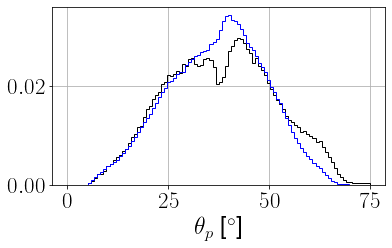

In [80]:
exp_2g.Ptheta.hist(bins= np.linspace(0, 75, 101), histtype = 'step', density = True, edgecolor = 'k')
df_3284_2g.Ptheta.hist(bins= np.linspace(0, 75, 101), histtype = 'step', density = True, edgecolor = 'b')
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.show()

<AxesSubplot:>

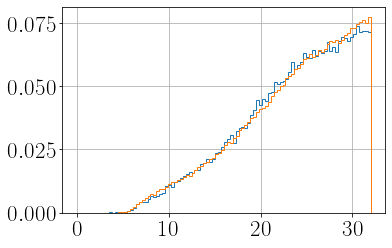

In [34]:
exp_2g.loc[exp_2g.Psector<7, "Ptheta"].hist(bins= np.linspace(0, 32, 101), histtype = 'step', density = True)
df_3284_2g.loc[df_3284_2g.Psector<7, "Ptheta"].hist(bins= np.linspace(0, 32, 101), histtype = 'step', density = True)

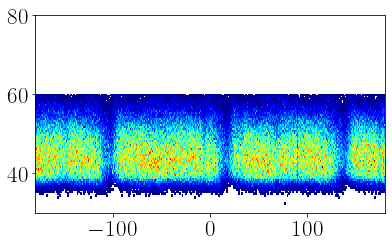

In [107]:
plt.hist2d(df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, "Pphi"], df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, "Ptheta"], cmap = cmap, cmin = 1, bins = [np.linspace(-180, 180, 361), np.linspace(30, 80, 101)])
plt.show()

In [8]:
exp_2g_corr = exp_2g_corr.loc[(exp_2g_corr.Ee>3)&(exp_2g_corr.Ge>2)&(((exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<32))|((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60)))& (exp_2g_corr.Gsector<7) & (exp_2g_corr.Gsector2<7) ]
df_3284_2g_corr = df_3284_2g_corr.loc[(df_3284_2g_corr.Ee>3)&(df_3284_2g_corr.Ge>2)&(((df_3284_2g_corr.Psector<7)&(df_3284_2g_corr.Ptheta<32))|((df_3284_2g_corr.Psector>7)&(df_3284_2g_corr.Ptheta<60))) & (df_3284_2g_corr.Gsector<7) & (df_3284_2g_corr.Gsector2<7) ]
df_2942_corr = df_2942_corr.loc[(df_2942_corr.Ee>3)&(df_2942_corr.Ge>2)&(((df_2942_corr.Psector<7)&(df_2942_corr.Ptheta<32))|((df_2942_corr.Psector>7)&(df_2942_corr.Ptheta<60)))& (df_2942_corr.Gsector<7) ]
exp_1g_corr = exp_1g_corr.loc[(exp_1g_corr.Ee>3)&(exp_1g_corr.Ge>2)&(((exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<32))|((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60)))& (exp_1g_corr.Gsector<7) ]
df_3284_1g_corr = df_3284_1g_corr.loc[(df_3284_1g_corr.Ee>3)&(df_3284_1g_corr.Ge>2)&(((df_3284_1g_corr.Psector<7)&(df_3284_1g_corr.Ptheta<32))|((df_3284_1g_corr.Psector>7)&(df_3284_1g_corr.Ptheta<60)))& (df_3284_1g_corr.Gsector<7)]

<AxesSubplot:>

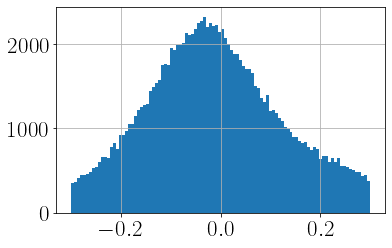

In [101]:
len(exp_1g_corr.loc[(exp_1g_corr.Psector>7)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Ee>4)])
exp_1g_corr.loc[(exp_1g_corr.Psector>7)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Ee>4), "MM2_ep"].hist(bins = np.linspace(-0.3, 0.3, 101))

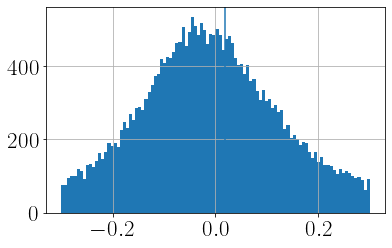

In [100]:
exp_2g_corr.loc[(exp_2g_corr.Psector>7)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Ee>4), "MM2_ep"].hist(bins = np.linspace(-0.3, 0.3, 101))
plt.axvline(0.135**2)
plt.show()

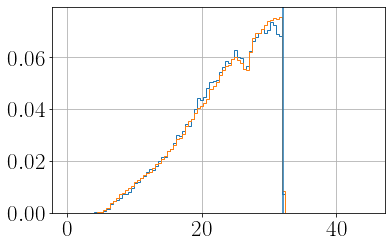

In [9]:
exp_2g_corr.loc[exp_2g_corr.Psector<7, "Ptheta"].hist(bins= np.linspace(0, 45, 101), histtype = 'step', density = True)
df_3284_2g_corr.loc[df_3284_2g_corr.Psector<7, "Ptheta"].hist(bins= np.linspace(0, 45, 101), histtype = 'step', density = True)
plt.axvline(32)

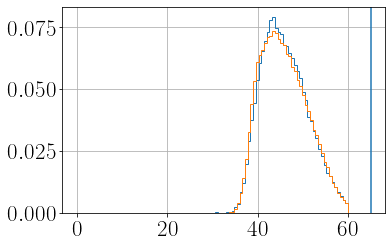

In [36]:
exp_2g_corr.loc[exp_2g_corr.Psector>7, "Ptheta"].hist(bins= np.linspace(0, 60, 101), histtype = 'step', density = True)
df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, "Ptheta"].hist(bins= np.linspace(0, 60, 101), histtype = 'step', density = True)
plt.axvline(65)

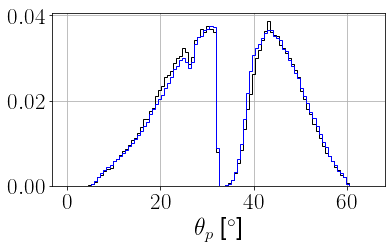

In [81]:
exp_2g_corr.Ptheta.hist(bins= np.linspace(0, 65, 101), histtype = 'step', density = True, edgecolor = 'k')
df_3284_2g_corr.Ptheta.hist(bins= np.linspace(0, 65, 101), histtype = 'step', density = True, edgecolor = 'b')
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.show()

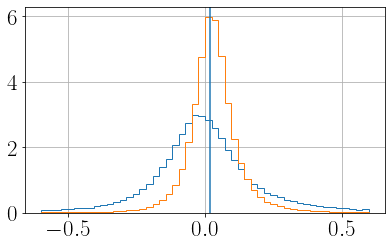

In [15]:
exp_2g_corr.loc[exp_2g_corr.Psector>7, "MM2_ep"].hist(bins= np.linspace(-0.6, 0.6, 51), histtype = 'step', density = True)
df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, "MM2_ep"].hist(bins= np.linspace(-0.6, 0.6, 51), histtype = 'step', density = True)
plt.axvline(0.135**2)

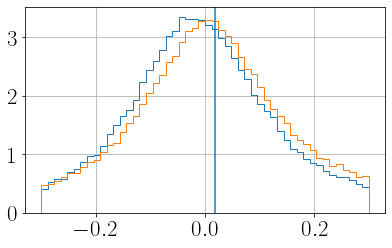

In [48]:
exp_2g_corr.loc[exp_2g_corr.Psector>7, "MM2_ep"].hist(bins= np.linspace(-0.3, 0.3, 51), histtype = 'step', density = True)
exp_2g.loc[exp_2g.Psector>7, "MM2_ep"].hist(bins= np.linspace(-0.3, 0.3, 51), histtype = 'step', density = True)
# df_3284_2g_corr.loc[df_3284_2g_corr.Psector<7, "MM2_ep"].hist(bins= np.linspace(-0.6, 0.6, 51), histtype = 'step', density = True)
plt.axvline(0.135**2)

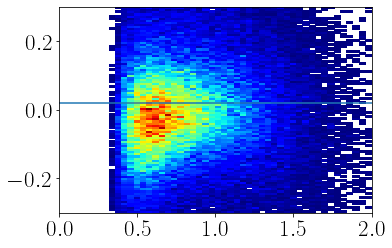

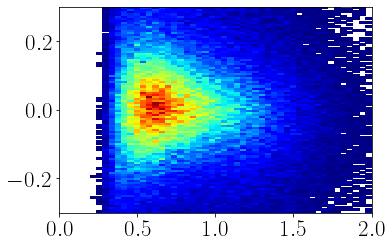

In [59]:
# exp_2g_corr.loc[exp_2g_corr.Psector>7, "MM2_ep"].hist(bins= np.linspace(-0.6, 0.6, 51), histtype = 'step', density = True)
plt.axhline(0.135**2)
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Psector>7, "Pp"], exp_2g_corr.loc[exp_2g_corr.Psector>7, "MM2_ep"], bins = [np.linspace(0, 2, 51), np.linspace(-0.3, 0.3, 101)], cmap = cmap, cmin = 1)
plt.show()
# plt.axhline(0.135**2)
plt.hist2d(exp_2g.loc[exp_2g.Psector>7, "Pp"], exp_2g.loc[exp_2g.Psector>7, "MM2_ep"], bins = [np.linspace(0, 2, 51), np.linspace(-0.3, 0.3, 101)], cmap = cmap, cmin = 1)
plt.show()

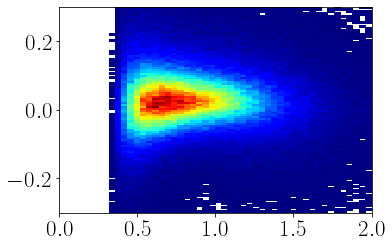

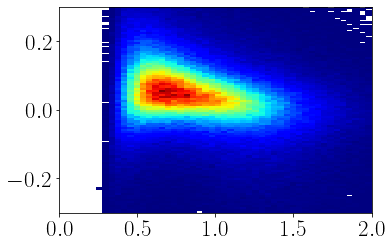

In [58]:
# exp_2g_corr.loc[exp_2g_corr.Psector>7, "MM2_ep"].hist(bins= np.linspace(-0.6, 0.6, 51), histtype = 'step', density = True)
# plt.axhline(0.135**2)
plt.hist2d(df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, "Pp"], df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, "MM2_ep"], bins = [np.linspace(0, 2, 51), np.linspace(-0.3, 0.3, 101)], cmap = cmap, cmin = 1)
plt.show()
# plt.axhline(0.135**2)
plt.hist2d(df_3284_2g.loc[df_3284_2g.Psector>7, "Pp"], df_3284_2g.loc[df_3284_2g.Psector>7, "MM2_ep"], bins = [np.linspace(0, 2, 51), np.linspace(-0.3, 0.3, 101)], cmap = cmap, cmin = 1)
plt.show()

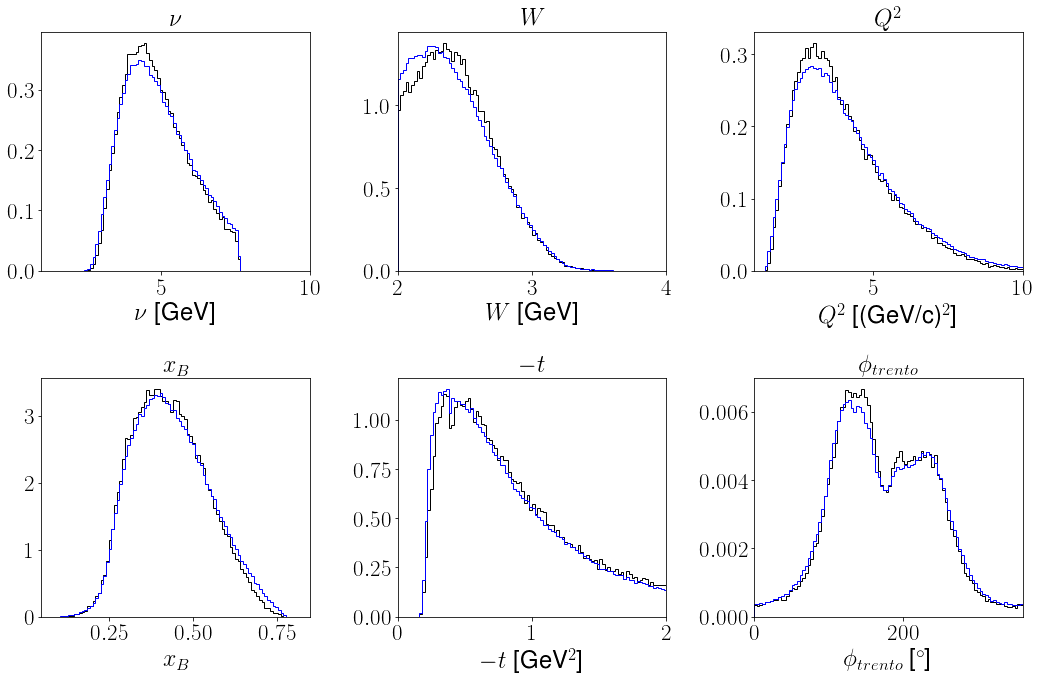

In [73]:
varstoplot = ["nu", "W", "Q2", "xB", "t", "phi1"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [1, 2, 1, 0.05, 0, 0]
binends = [10, 4, 10, 0.85, 2, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(exp_2g_corr.loc[exp_2g_corr.Psector<7, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(df_3284_2g_corr.loc[df_3284_2g_corr.Psector<7, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

<AxesSubplot:>

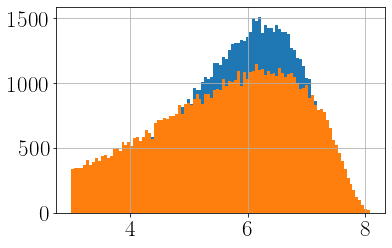

In [85]:
exp_2g_corr.loc[exp_2g_corr.Psector<7, "Ee"].hist(bins = 101)
exp_2g_corr.loc[exp_2g_corr.Psector>7, "Ee"].hist(bins = 101)

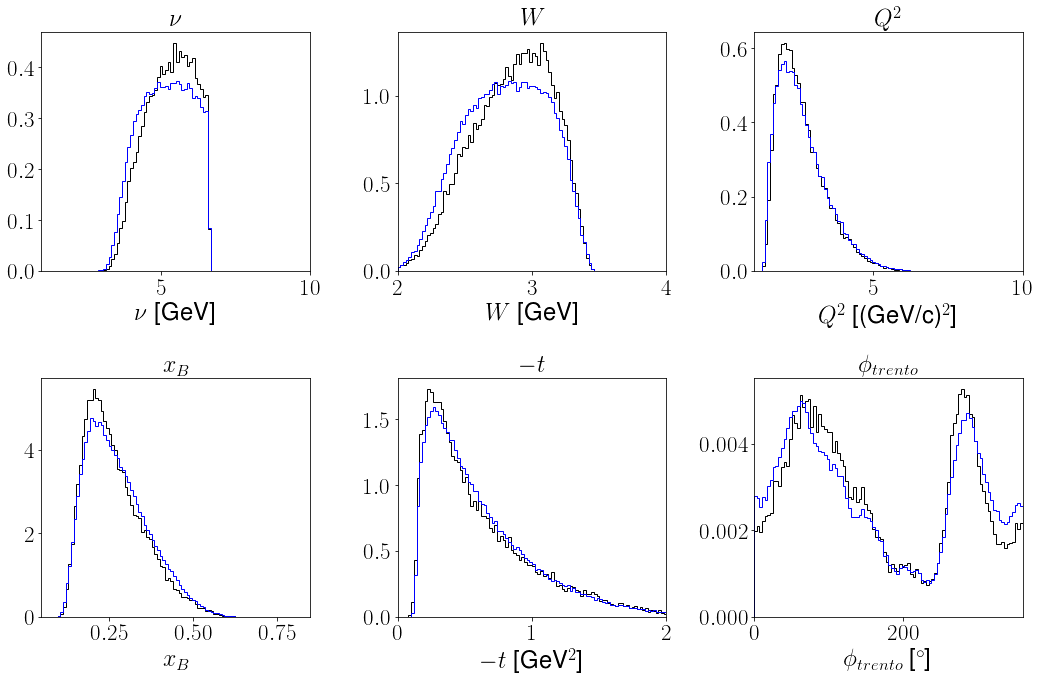

In [102]:
varstoplot = ["nu", "W", "Q2", "xB", "t", "phi1"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [1, 2, 1, 0.05, 0, 0]
binends = [10, 4, 10, 0.85, 2, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(exp_2g_corr.loc[(exp_2g_corr.Psector>7)&(exp_2g_corr.Ee>4)&(exp_2g_corr.Ge>3), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(df_3284_2g_corr.loc[(df_3284_2g_corr.Psector>7)&(df_3284_2g_corr.Ee>4)&(df_3284_2g_corr.Ge>3), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

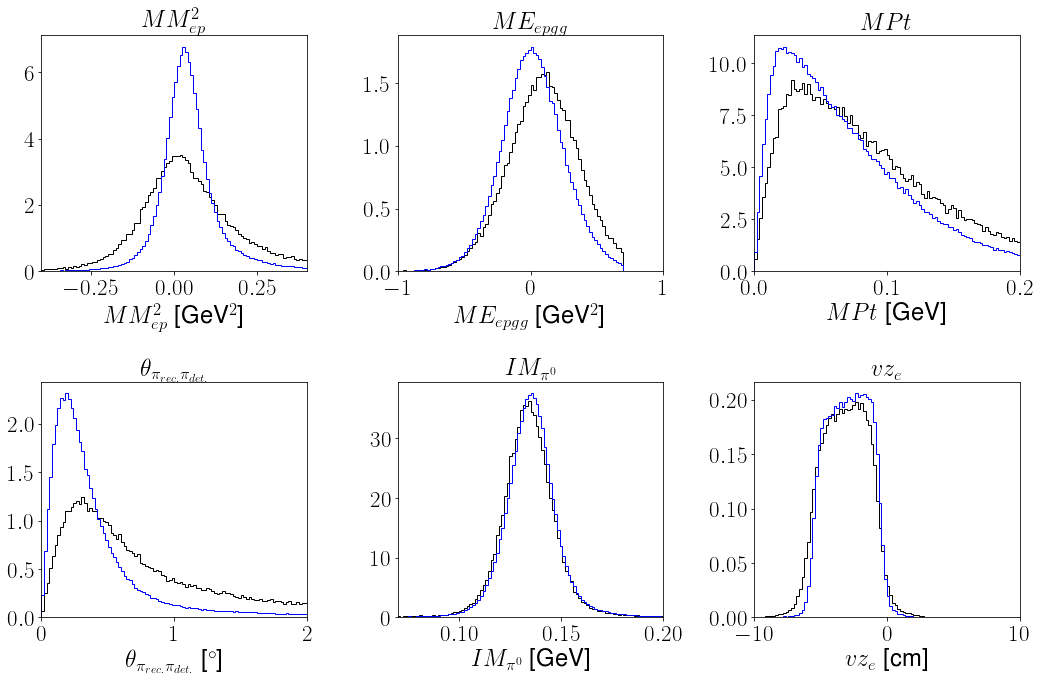

In [63]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "Evz"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$vz_e$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, "cm", GeV, "cm"]
binstarts = [-0.4, -1, 0, 0, 0.07, -10]
binends = [0.4, 1, 0.2, 2, 0.2, 10]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(exp_2g_corr.loc[exp_2g_corr.Psector<7, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(df_3284_2g_corr.loc[df_3284_2g_corr.Psector<7, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

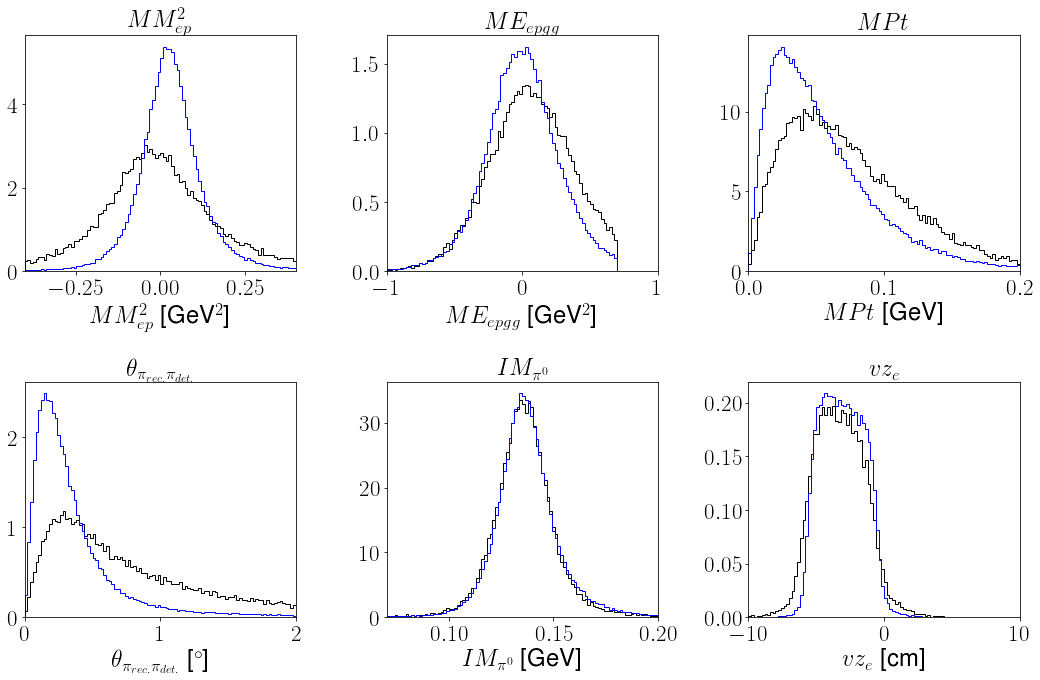

In [93]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "Evz"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$vz_e$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, "cm", GeV, "cm"]
binstarts = [-0.4, -1, 0, 0, 0.07, -10]
binends = [0.4, 1, 0.2, 2, 0.2, 10]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(exp_2g_corr.loc[(exp_2g_corr.Psector>7)&(exp_2g_corr.Ee>4)&(exp_2g_corr.Ge>3), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(df_3284_2g_corr.loc[(df_3284_2g_corr.Psector>7)&(df_3284_2g_corr.Ee>4)&(df_3284_2g_corr.Ge>3), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

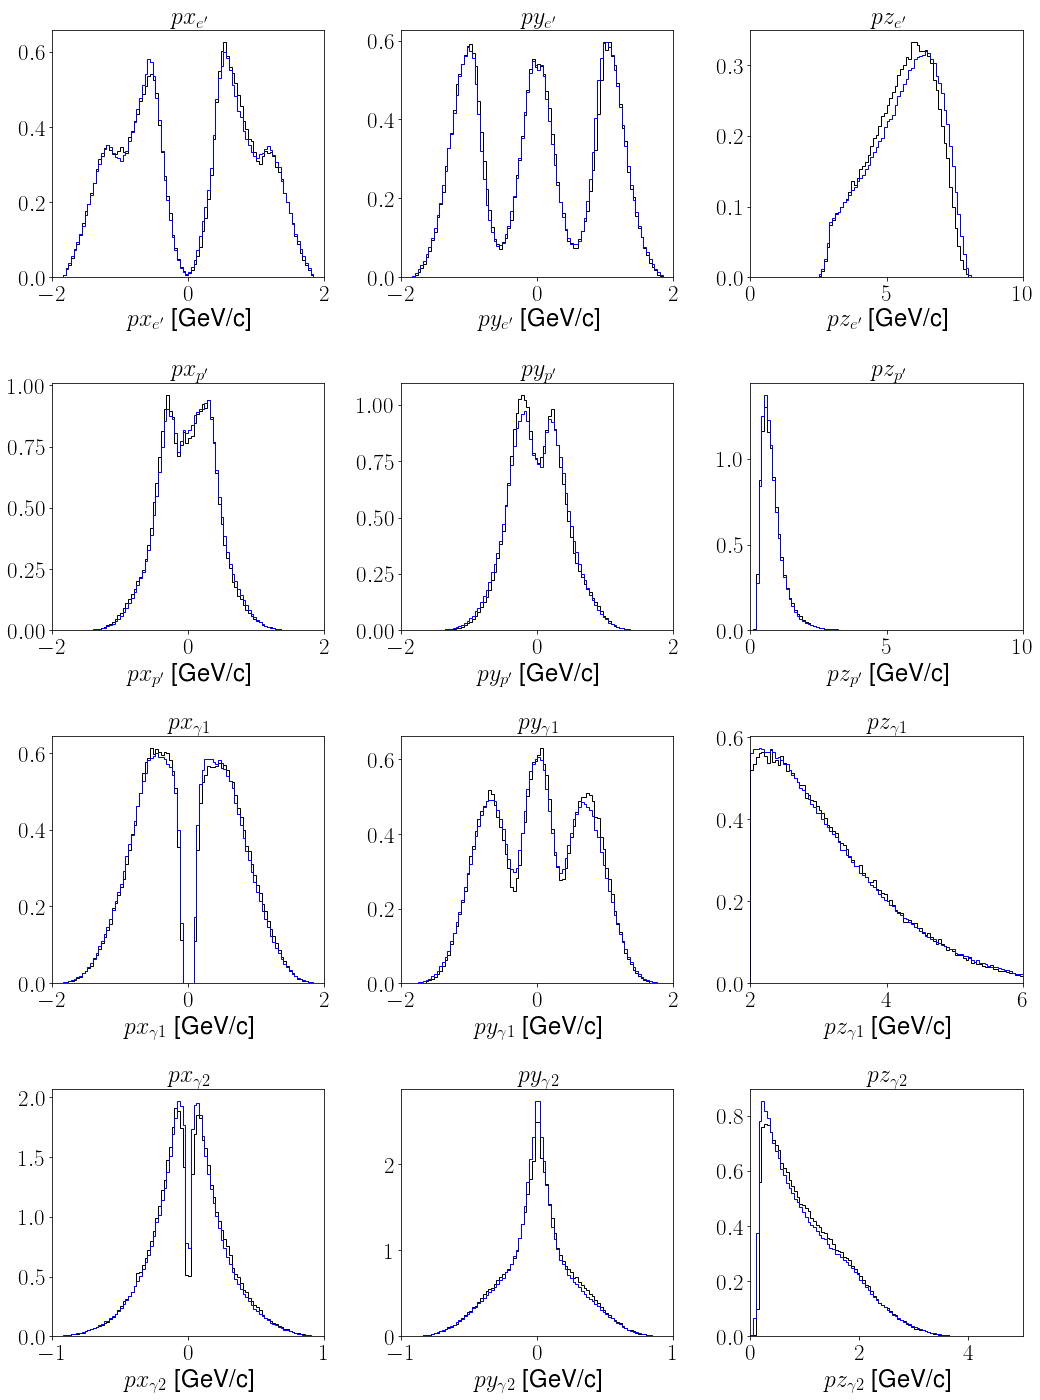

<Figure size 432x288 with 0 Axes>

In [135]:
varstoplot = ["Epx", "Epy", "Epz", "Ppx", "Ppy", "Ppz", "Gpx", "Gpy", "Gpz", "Gpx2", "Gpy2", "Gpz2"]
title = [r"$px_{e'}$", r"$py_{e'}$", r"$pz_{e'}$", r"$px_{p'}$", r"$py_{p'}$", r"$pz_{p'}$", r"$px_{\gamma1}$", r"$py_{\gamma1}$", r"$pz_{\gamma1}$", r"$px_{\gamma2}$", r"$py_{\gamma2}$", "$pz_{\gamma2}$"]
unit = [GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
binstarts = [-2, -2, 0, -2, -2, 0, -2, -2, 2, -1, -1, 0]
binends = [2, 2, 10, 2, 2, 10, 2, 2, 6, 1, 1, 5]
fig, axs = plt.subplots(4, 3, figsize = (15,20))
for xind in range(0,3):
    for yind in range(0, 4):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(exp_2g_corr[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(df_3284_2g_corr[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()


In [ ]:
# bkgSimInbFD = df_3284_1g_corr.loc[(df_3284_1g_corr.Psector<7)&(df_3284_1g_corr.Ptheta<35), :]
# pi0SimInbFD = df_3284_2g_corr.loc[(df_3284_2g_corr.Psector<7)&(df_3284_2g_corr.Ptheta<35)&(df_3284_2g_corr.Ge>2)&(df_3284_2g_corr.Ee>3), :]
# pi0ExpInbFD = exp_2g_corr.loc[(exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<35)&(exp_2g_corr.Ge>2)&(exp_2g_corr.Ee>3), :]
# epgExpInbFD = exp_1g_corr.loc[(exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<35), :]
# dvcsSimInbFD = df_2942_corr.loc[(df_2942_corr.Psector<7)&(df_2942_corr.Ptheta<35), :]
len_bkgSimInbFD = len(bkgSimInbFD)
len_pi0SimInbFD = len(pi0SimInbFD)
len_pi0ExpInbFD = len(pi0ExpInbFD)
len_epgExpInbFD = len(epgExpInbFD)
len_dvcsSimInbFD = len(dvcsSimInbFD)

<AxesSubplot:>

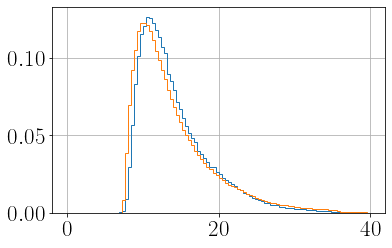

In [76]:
exp_2g_corr.Etheta.hist(bins = np.linspace(0, 40, 101), histtype = 'step', density = True)
df_3284_2g_corr.Etheta.hist(bins = np.linspace(0, 40, 101), histtype = 'step', density = True)

<AxesSubplot:>

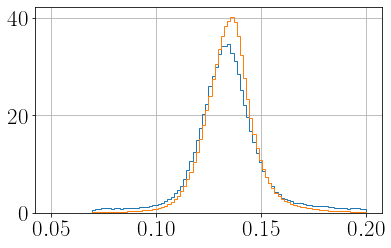

In [108]:
exp_2g_corr.Mpi0.hist(bins = np.linspace(0.05, 0.2, 101), histtype = 'step', density = True)
df_3284_2g_corr.Mpi0.hist(bins = np.linspace(0.05, 0.2, 101), histtype = 'step', density = True)

In [243]:
# exp_2g_corr = exp_2g_corr.loc[exp_2g_corr.Psector>7, :]

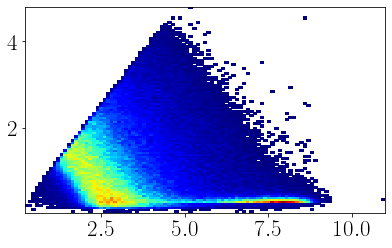

In [110]:
plt.hist2d(exp_2g_corr.Gp, exp_2g_corr.Gp2, bins = 101, cmap = cmap, cmin = 1)
plt.show()

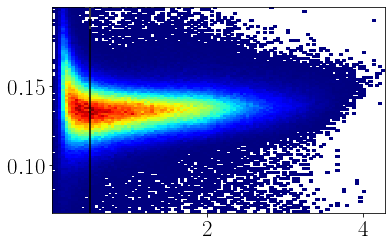

In [18]:
plt.hist2d(df_3284_2g_corr.Gp2, df_3284_2g_corr.Mpi0, bins = 101, cmap = cmap, cmin = 1)
plt.axvline(0.5, color = 'k')
plt.show()

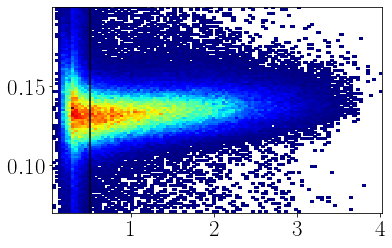

In [19]:
plt.hist2d(exp_2g_corr.Gp2, exp_2g_corr.Mpi0, bins = 101, cmap = cmap, cmin = 1)
plt.axvline(0.5, color = 'k')
plt.show()

In [137]:
exp_2g_corr = exp_2g_corr.loc[exp_2g_corr.Gp2>0.5, :]
df_3284_2g_corr = df_3284_2g_corr.loc[df_3284_2g_corr.Gp2>0.5, :]

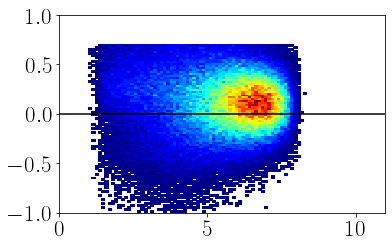

In [366]:
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Gp<10, "Ep"], exp_2g_corr.loc[exp_2g_corr.Gp<10,"ME_epgg"], bins = [np.linspace(0, 11, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.axhline(0, color = 'k')
plt.show()

In [252]:
exp_2g_corr.Gp2 = 0.135/exp_2g_corr.Mpi0*exp_2g_corr.Gp2
exp_2g_corr.Gp = 0.135/exp_2g_corr.Mpi0*exp_2g_corr.Gp

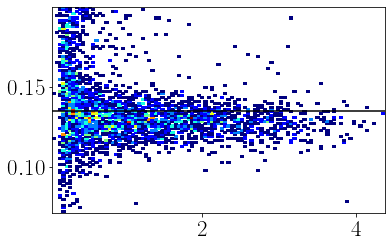

In [236]:
plt.hist2d(exp_2g_corr.loc[((exp_2g_corr.Gsector2<7)&(exp_2g_corr.Gsector>7)), "Gp2"], exp_2g_corr.loc[((exp_2g_corr.Gsector2<7)&(exp_2g_corr.Gsector>7)), "Mpi0"], bins = 101, cmap = cmap, cmin = 1)
plt.axhline(0.135, color = 'k')
plt.show()

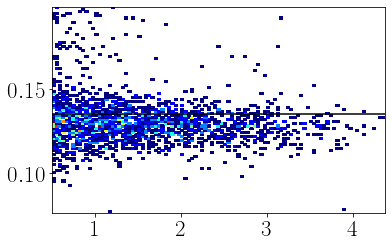

In [340]:
plt.hist2d(exp_2g_corr.loc[((exp_2g_corr.Gsector2<7)&(exp_2g_corr.Gsector>7)), "Gp2"], exp_2g_corr.loc[((exp_2g_corr.Gsector2<7)&(exp_2g_corr.Gsector>7)), "Mpi0"], bins = 101, cmap = cmap, cmin = 1)
plt.axhline(0.135, color = 'k')
plt.show()

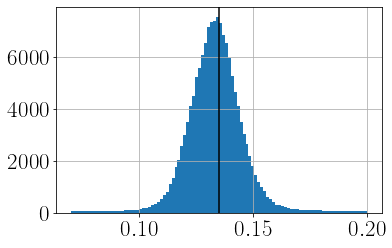

In [237]:
exp_2g_corr.loc[exp_2g_corr.Gp2>0.5, "Mpi0"].hist(bins = np.linspace(0.07, 0.2, 101))
plt.axvline(0.135, color = 'k')
plt.show()

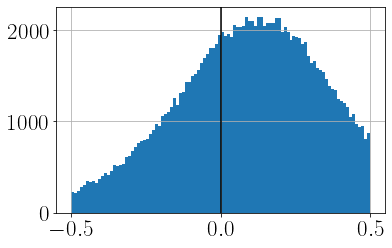

In [238]:
exp_2g_corr.loc[exp_2g_corr.Gp2>0.5, "ME_epgg"].hist(bins = np.linspace(-0.5, 0.5, 101))
plt.axvline(0, color = 'k')
plt.show()

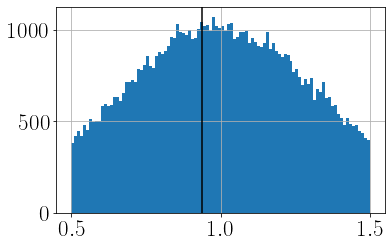

In [123]:
exp_2g_corr.loc[exp_2g_corr.Gp2>1, "MM2_egg"].hist(bins = np.linspace(0.5 ,1.5, 101))
df_.loc[exp_2g_corr.Gp2>1, "MM2_egg"].hist(bins = np.linspace(0.5 ,1.5, 101))
plt.axvline(0.938, color = 'k')
plt.show()

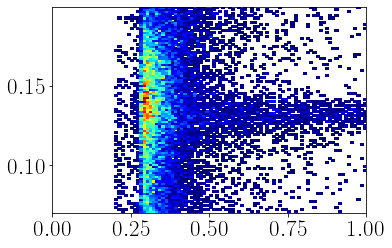

In [189]:
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Gsector2>7, "Gp2"], exp_2g_corr.loc[exp_2g_corr.Gsector2>7, "Mpi0"], bins = [np.linspace(0,1, 101), 101], cmap = cmap, cmin = 1)
plt.show()

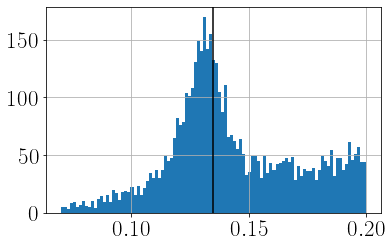

In [191]:
exp_2g_corr.loc[((exp_2g_corr.Gsector<7)&(exp_2g_corr.Gsector2>7))|((exp_2g_corr.Gsector>7)&(exp_2g_corr.Gsector2<7)), "Mpi0"].hist(bins = 101)
plt.axvline(0.135, color = 'k')
plt.show()

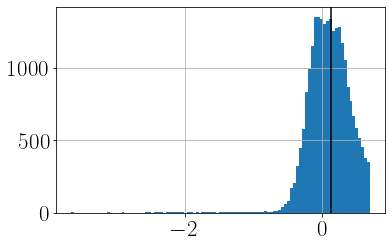

In [91]:
exp_2g_corr.loc[((exp_2g_corr.Gsector>7)&(exp_2g_corr.Gsector2>7)), "ME_epgg"].hist(bins = 101)
plt.axvline(0.135, color = 'k')
plt.show()

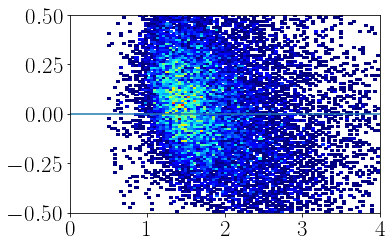

In [373]:
plt.hist2d(exp_2g_corr.loc[(exp_2g_corr.Gp2>0.5)&(exp_2g_corr.Gp2>exp_2g_corr.Gp-0.3), "Gp2"], ((0.135**2/exp_2g_corr.loc[(exp_2g_corr.Gp2>0.5)&(exp_2g_corr.Gp2>exp_2g_corr.Gp-0.3), "Mpi0"]**2)-1)*exp_2g_corr.loc[(exp_2g_corr.Gp2>0.5)&(exp_2g_corr.Gp2>exp_2g_corr.Gp-0.3), "Gp"], bins = [np.linspace(0,4, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1)
plt.axhline(0)
plt.show()

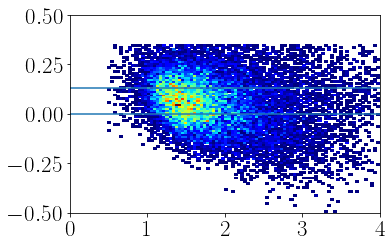

In [400]:
plt.hist2d(exp_2g_corr.loc[(exp_2g_corr.Gp2>0.5)&(exp_2g_corr.Gp2>exp_2g_corr.Gp-0.3), "Gp2"], exp_2g_corr.loc[(exp_2g_corr.Gp2>0.5)&(exp_2g_corr.Gp2>exp_2g_corr.Gp-0.3), "ME_epgg"]/2, bins = [np.linspace(0,4, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1)
plt.axhline(0)
plt.axhline(0.13)
plt.show()

In [406]:
newGpz = exp_2g_corr.Gpz*0 + np.select([exp_2g_corr.Gp<=1, (exp_2g_corr.Gp<3) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp>=3],[exp_2g_corr.Gpz+0.13, exp_2g_corr.Gpz+0.13*0.5*(-exp_2g_corr.Gp+3), exp_2g_corr.Gpz])
newGpx = exp_2g_corr.Gpx*0 + np.select([exp_2g_corr.Gp<=1, (exp_2g_corr.Gp<3) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp>=3],[exp_2g_corr.Gpx+0.13*exp_2g_corr.Gpx/exp_2g_corr.Gp, exp_2g_corr.Gpx+0.13*0.5*(-exp_2g_corr.Gp+3)*exp_2g_corr.Gpx/exp_2g_corr.Gp, exp_2g_corr.Gpx])
newGpy = exp_2g_corr.Gpy*0 + np.select([exp_2g_corr.Gp<=1, (exp_2g_corr.Gp<3) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp>=3],[exp_2g_corr.Gpy+0.13*exp_2g_corr.Gpy/exp_2g_corr.Gp, exp_2g_corr.Gpy+0.13*0.5*(-exp_2g_corr.Gp+3)*exp_2g_corr.Gpy/exp_2g_corr.Gp, exp_2g_corr.Gpy])
newGpz2 = exp_2g_corr.Gpz2*0 + np.select([exp_2g_corr.Gp<=1, (exp_2g_corr.Gp<3) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp>=3],[exp_2g_corr.Gpz2+0.13, exp_2g_corr.Gpz2+0.13*0.5*(-exp_2g_corr.Gp2+3), exp_2g_corr.Gpz2])
newGpx2 = exp_2g_corr.Gpx2*0 + np.select([exp_2g_corr.Gp<=1, (exp_2g_corr.Gp<3) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp>=3],[exp_2g_corr.Gpx2+0.13*exp_2g_corr.Gpx2/exp_2g_corr.Gp2, exp_2g_corr.Gpx2+0.13*0.5*(-exp_2g_corr.Gp2+3)*exp_2g_corr.Gpx2/exp_2g_corr.Gp2, exp_2g_corr.Gpx2])
newGpy2 = exp_2g_corr.Gpy2*0 + np.select([exp_2g_corr.Gp<=1, (exp_2g_corr.Gp<3) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp>=3],[exp_2g_corr.Gpy2+0.13*exp_2g_corr.Gpy2/exp_2g_corr.Gp2, exp_2g_corr.Gpy2+0.13*0.5*(-exp_2g_corr.Gp2+3)*exp_2g_corr.Gpy2/exp_2g_corr.Gp2, exp_2g_corr.Gpy2])

In [368]:
newGpz = exp_2g_corr.Gpz*0 + np.select([exp_2g_corr.Gp>=2, (exp_2g_corr.Gp<2) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp<=1],[exp_2g_corr.Gpz+0.13, exp_2g_corr.Gpz+0.13*(exp_2g_corr.Gpz-1), exp_2g_corr.Gpz])
newGpx = exp_2g_corr.Gpx*0 + np.select([exp_2g_corr.Gp>=2, (exp_2g_corr.Gp<2) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp<=1],[exp_2g_corr.Gpx+0.13*exp_2g_corr.Gpx/exp_2g_corr.Gp, exp_2g_corr.Gpx+0.13*(exp_2g_corr.Gpz-1)*exp_2g_corr.Gpx/exp_2g_corr.Gp, exp_2g_corr.Gpx])
newGpy = exp_2g_corr.Gpy*0 + np.select([exp_2g_corr.Gp>=2, (exp_2g_corr.Gp<2) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp<=1],[exp_2g_corr.Gpy+0.13*exp_2g_corr.Gpy/exp_2g_corr.Gp, exp_2g_corr.Gpy+0.13*(exp_2g_corr.Gpz-1)*exp_2g_corr.Gpy/exp_2g_corr.Gp, exp_2g_corr.Gpy])
newGpz2 = exp_2g_corr.Gpz2*0 + np.select([exp_2g_corr.Gp>=2, (exp_2g_corr.Gp<2) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp<=1],[exp_2g_corr.Gpz2+0.13, exp_2g_corr.Gpz2+0.13*(exp_2g_corr.Gpz2-1), exp_2g_corr.Gpz2])
newGpx2 = exp_2g_corr.Gpx2*0 + np.select([exp_2g_corr.Gp>=2, (exp_2g_corr.Gp<2) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp<=1],[exp_2g_corr.Gpx2+0.13*exp_2g_corr.Gpx2/exp_2g_corr.Gp2, exp_2g_corr.Gpx2+0.13*(exp_2g_corr.Gpz2-1)*exp_2g_corr.Gpx2/exp_2g_corr.Gp2, exp_2g_corr.Gpx2])
newGpy2 = exp_2g_corr.Gpy2*0 + np.select([exp_2g_corr.Gp>=2, (exp_2g_corr.Gp<2) & (exp_2g_corr.Gp>1), exp_2g_corr.Gp<=1],[exp_2g_corr.Gpy2+0.13*exp_2g_corr.Gpy2/exp_2g_corr.Gp2, exp_2g_corr.Gpy2+0.13*(exp_2g_corr.Gpz2-1)*exp_2g_corr.Gpy2/exp_2g_corr.Gp2, exp_2g_corr.Gpy2])


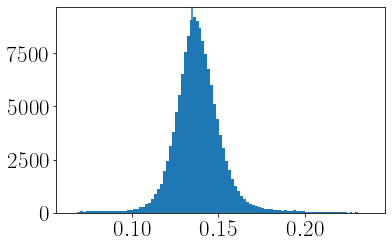

In [407]:
plt.hist(pi0InvMass([newGpx, newGpy, newGpz], [newGpx2, newGpy2, newGpz2]), bins = 101)
plt.axvline(0.135)
plt.show()

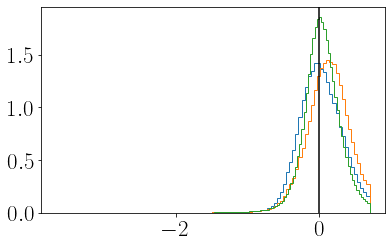

In [440]:
plt.hist((M + ebeam - exp_2g_corr["Ee"] - exp_2g_corr["Pe"] - mag([newGpx, newGpy, newGpz]) - mag([newGpx2, newGpy2, newGpz2])), bins = 101, density=True, histtype = 'step')
plt.hist(exp_2g_corr.ME_epgg, bins = 101, histtype = 'step', density=True)
plt.hist(df_3284_2g_corr.ME_epgg, bins = 101, histtype = 'step', density=True)
plt.axvline(0, color = 'k')
plt.show()

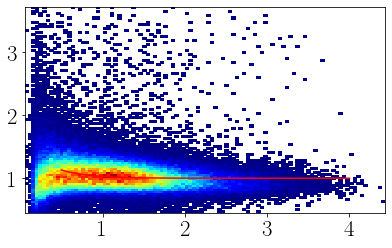

In [513]:
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Psector<7, "Gp2"], (0.135/exp_2g_corr.loc[exp_2g_corr.Psector<7, "Mpi0"])**2, bins = 101, cmin = 1, cmap = cmap)
plt.plot(np.linspace(0.5, 4, 101), 1+0.13*np.exp(-3*((np.linspace(0.5, 4, 101)-0.5))), color='r')
plt.show()

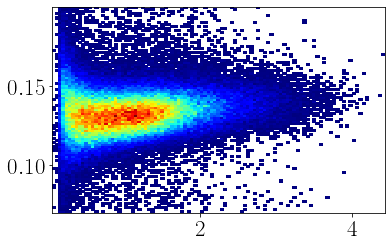

In [517]:
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Psector<7, "Gp2"], exp_2g_corr.loc[exp_2g_corr.Psector<7, "Mpi0"], bins = 101, cmin = 1, cmap = cmap)
# plt.plot(np.linspace(0.5, 4, 101), 1+0.13*np.exp(-3*((np.linspace(0.5, 4, 101)-0.5))), color='r')
plt.show()

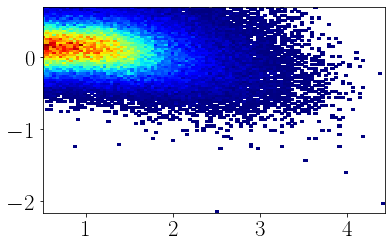

In [388]:
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Psector<7, "Gp2"], exp_2g_corr.loc[exp_2g_corr.Psector<7, "ME_epgg"], bins = 101, cmin = 1, cmap = cmap)
plt.axhline(1)
plt.show()

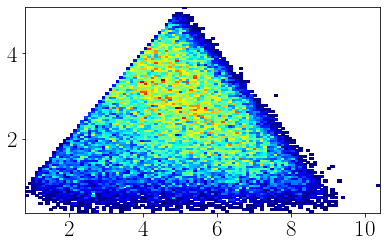

In [160]:
plt.hist2d(df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, "Gp"], df_3284_2g_corr.loc[df_3284_2g_corr.Gsector2>7, "Gp2"], bins = 101, cmin = 1, cmap = cmap)
plt.show()

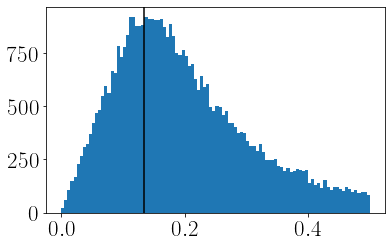

In [186]:
plt.hist(pi0InvMass([exp_2g_corr.Gpx, exp_2g_corr.Gpy, exp_2g_corr.Gpz], [exp_2g_corr.Mpx, exp_2g_corr.Mpy, exp_2g_corr.Mpz]), bins = np.linspace(0, 0.5, 101))
plt.axvline(0.135, color = 'k')
plt.show()

<AxesSubplot:>

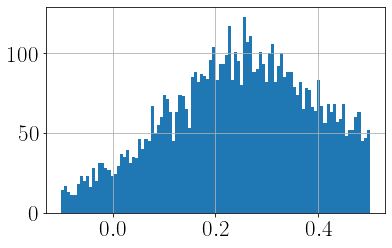

In [358]:
exp_2g_corr.loc[(exp_2g_corr.Gsector>7)&(exp_2g_corr.Gsector2>7), "ME_epgg"].hist(bins = np.linspace(-0.1, 0.5, 101))

<AxesSubplot:>

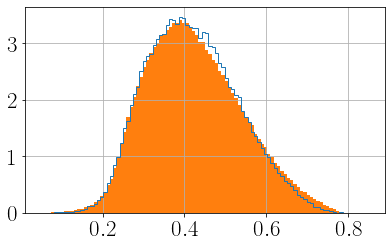

In [75]:
exp_2g_corr.loc[exp_2g_corr.Psector<7,"xB"].hist(bins = np.linspace(0.05, 0.85, 101), density=True, histtype = 'step')
df_3284_2g_corr.loc[df_3284_2g_corr.Psector<7,"xB"].hist(bins = np.linspace(0.05, 0.85, 101), density=True)

<AxesSubplot:>

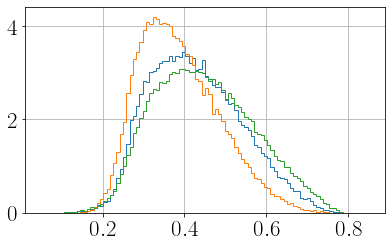

In [93]:
exp_1g_corr.loc[exp_1g_corr.Psector<7,"xB"].hist(bins = np.linspace(0.05, 0.85, 101), density=True, histtype = 'step')
df_2942_corr.loc[df_2942_corr.Psector<7,"xB"].hist(bins = np.linspace(0.05, 0.85, 101), density=True, histtype = 'step')
df_3284_1g_corr.loc[df_3284_1g_corr.Psector<7,"xB"].hist(bins = np.linspace(0.05, 0.85, 101), density=True, histtype = 'step')

In [162]:
bkgSimInbFD = df_3284_1g_corr.loc[(df_3284_1g_corr.Psector<7)&(df_3284_1g_corr.Ptheta<35), :]
pi0SimInbFD = df_3284_2g_corr.loc[(df_3284_2g_corr.Psector<7)&(df_3284_2g_corr.Ptheta<35), :]
pi0ExpInbFD = exp_2g_corr.loc[(exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<35), :]
epgExpInbFD = exp_1g_corr.loc[(exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<35), :]
dvcsSimInbFD = df_2942_corr.loc[(df_2942_corr.Psector<7)&(df_2942_corr.Ptheta<35), :]

# bkgSimInbFD = df_3284_1g_corr.loc[(df_3284_1g_corr.Psector>7), :]
# pi0SimInbFD = df_3284_2g_corr.loc[(df_3284_2g_corr.Psector>7), :]
# pi0ExpInbFD = exp_2g_corr.loc[(exp_2g_corr.Psector>7), :]
# epgExpInbFD = exp_1g_corr.loc[(exp_1g_corr.Psector>7), :]
# dvcsSimInbFD = df_2942_corr.loc[(df_2942_corr.Psector>7), :]
len_bkgSimInbFD = len(bkgSimInbFD)
len_pi0SimInbFD = len(pi0SimInbFD)
len_pi0ExpInbFD = len(pi0ExpInbFD)
len_epgExpInbFD = len(epgExpInbFD)
len_dvcsSimInbFD = len(dvcsSimInbFD)

In [163]:
c = len_pi0ExpInbFD*len_bkgSimInbFD/len_pi0SimInbFD/len_epgExpInbFD

In [168]:
bkgSimInbCD = df_3284_1g_corr.loc[(df_3284_1g_corr.Psector>7)&(df_3284_1g_corr.Ptheta<60), :]
pi0SimInbCD = df_3284_2g_corr.loc[(df_3284_2g_corr.Psector>7)&(df_3284_2g_corr.Ptheta<60), :]
pi0ExpInbCD = exp_2g_corr.loc[(exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60), :]
epgExpInbCD = exp_1g_corr.loc[(exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60), :]
dvcsSimInbCD = df_2942_corr.loc[(df_2942_corr.Psector>7)&(df_2942_corr.Ptheta<60), :]

# bkgSimInbFD = df_3284_1g_corr.loc[(df_3284_1g_corr.Psector>7), :]
# pi0SimInbFD = df_3284_2g_corr.loc[(df_3284_2g_corr.Psector>7), :]
# pi0ExpInbFD = exp_2g_corr.loc[(exp_2g_corr.Psector>7), :]
# epgExpInbFD = exp_1g_corr.loc[(exp_1g_corr.Psector>7), :]
# dvcsSimInbFD = df_2942_corr.loc[(df_2942_corr.Psector>7), :]
len_bkgSimInbCD = len(bkgSimInbCD)
len_pi0SimInbCD = len(pi0SimInbCD)
len_pi0ExpInbCD = len(pi0ExpInbCD)
len_epgExpInbCD = len(epgExpInbCD)
len_dvcsSimInbCD = len(dvcsSimInbCD)

In [169]:
c = len_pi0ExpInbCD*len_bkgSimInbCD/len_pi0SimInbCD/len_epgExpInbCD

In [170]:
print(c)
# c=0.6

0.22707594509441945


In [116]:
def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

nu 5.2155913017982165
xB 0.41948325220655996
W 2.5374965497524413
t2 0.7566854102003611
Q2 4.144818876396721
phi2 174.29444765212557


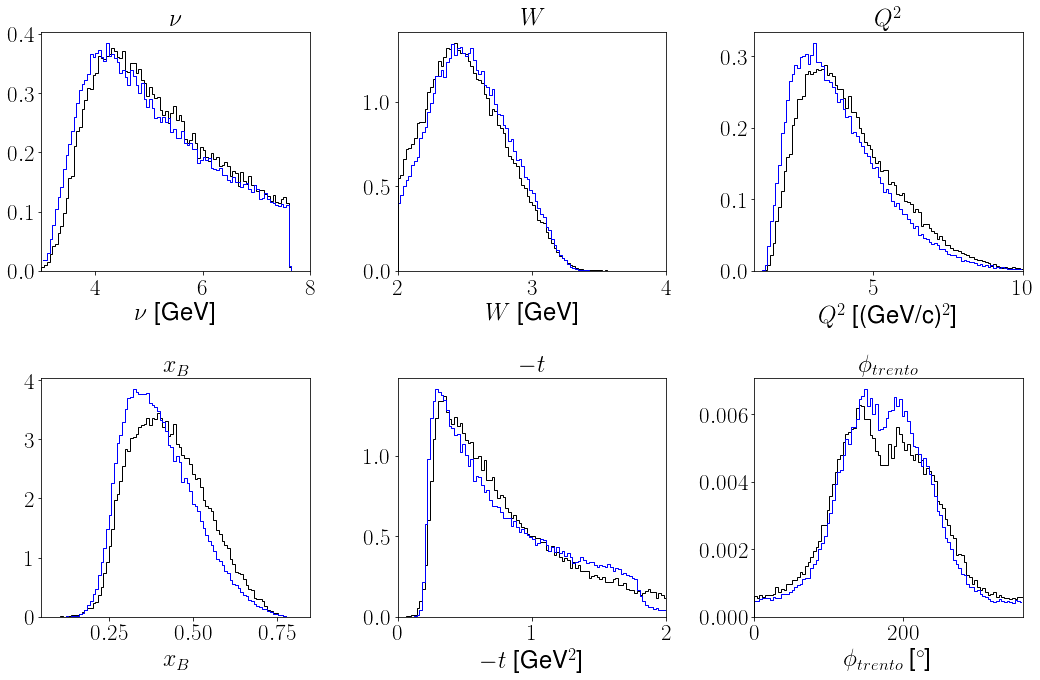

<Figure size 432x288 with 0 Axes>

In [177]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.05, 0, 0]
binends = [8, 4, 10, 0.85, 2, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-c)*simDist_dvcs + c*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 34.71338968761896
reconGam 0.5173277036205033
coplanarity 3.3370380342027564
ME_epg 0.2778742924627018
MM2_epg 0.00025927884562372425
MM2_eg 1.1163224988587548
MM2_ep 0.05337590117158675
MPt 0.10187265159585498


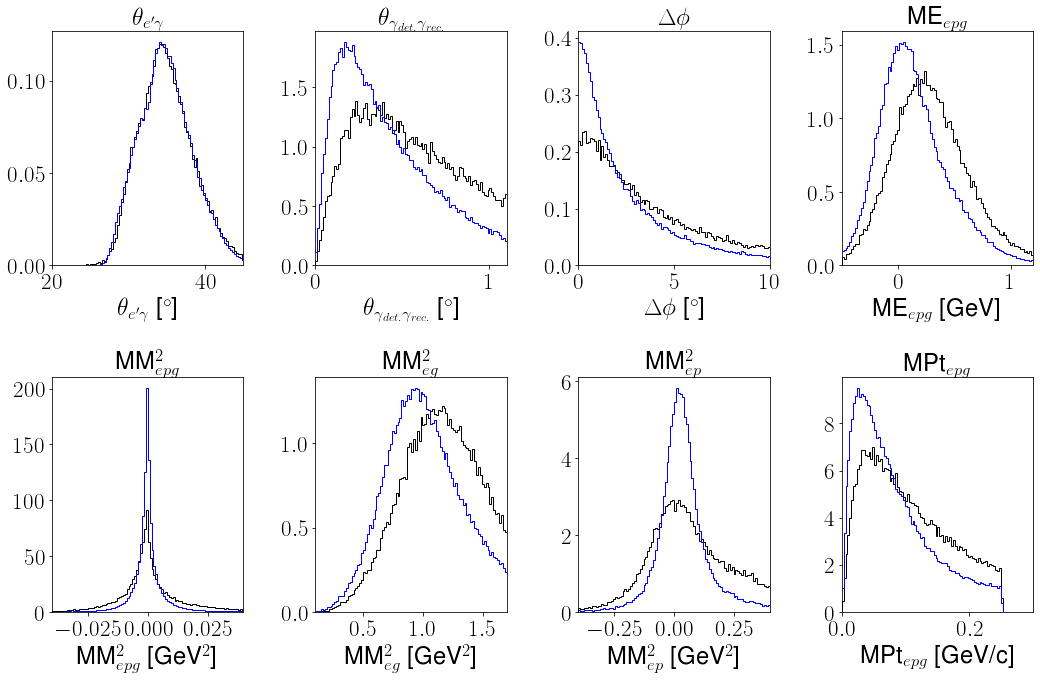

<Figure size 432x288 with 0 Axes>

In [166]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [45, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.3]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-c)*simDist_dvcs + c*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

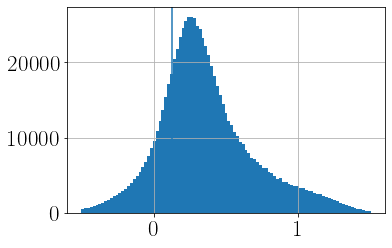

In [437]:
exp_1g_corr.ME_epg.hist(bins=101)
plt.axvline(0.13)

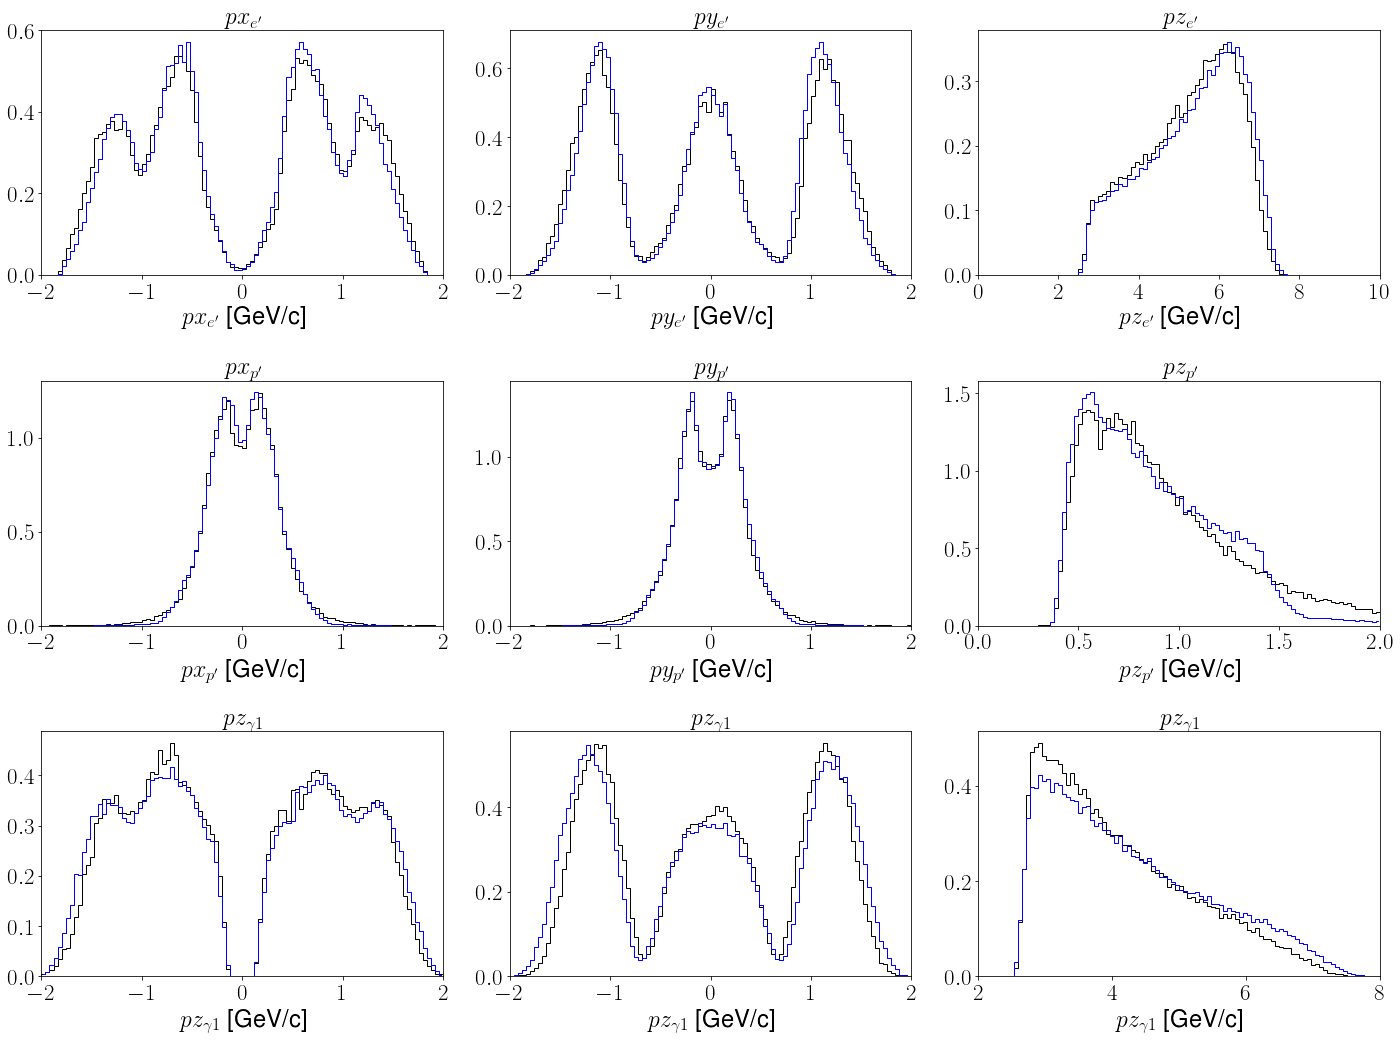

<Figure size 432x288 with 0 Axes>

In [175]:
varstoplot = ["Epx", "Epy", "Epz", "Ppx", "Ppy", "Ppz", "Gpx", "Gpy", "Gpz"]
title = [r"$px_{e'}$", r"$py_{e'}$", r"$pz_{e'}$", r"$px_{p'}$", r"$py_{p'}$", r"$pz_{p'}$", r"$pz_{\gamma1}$", r"$pz_{\gamma1}$", r"$pz_{\gamma1}$", r"$px_{\gamma2}$", r"$py_{\gamma2}$", "$pz_{\gamma2}$"]
unit = [GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
binstarts = [-2, -2, 0, -2, -2, 0, -2, -2, 2, -1, -1, 0]
binends = [2, 2, 10, 2, 2, 2, 2, 2, 8, 1, 1, 5]
fig, axs = plt.subplots(3, 3, figsize = (20,15))
for xind in range(0,3):
    for yind in range(0, 3):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-c)*simDist_dvcs + c*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        simDist = (1-c)*simDist_dvpi0 + c*simDist_dvcs
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()


nu 5.758894841747606
xB 0.24526297518924886
W 2.9982699608252004
t2 0.43895023434501923
Q2 2.5699798174583144
phi2 158.68847706181282


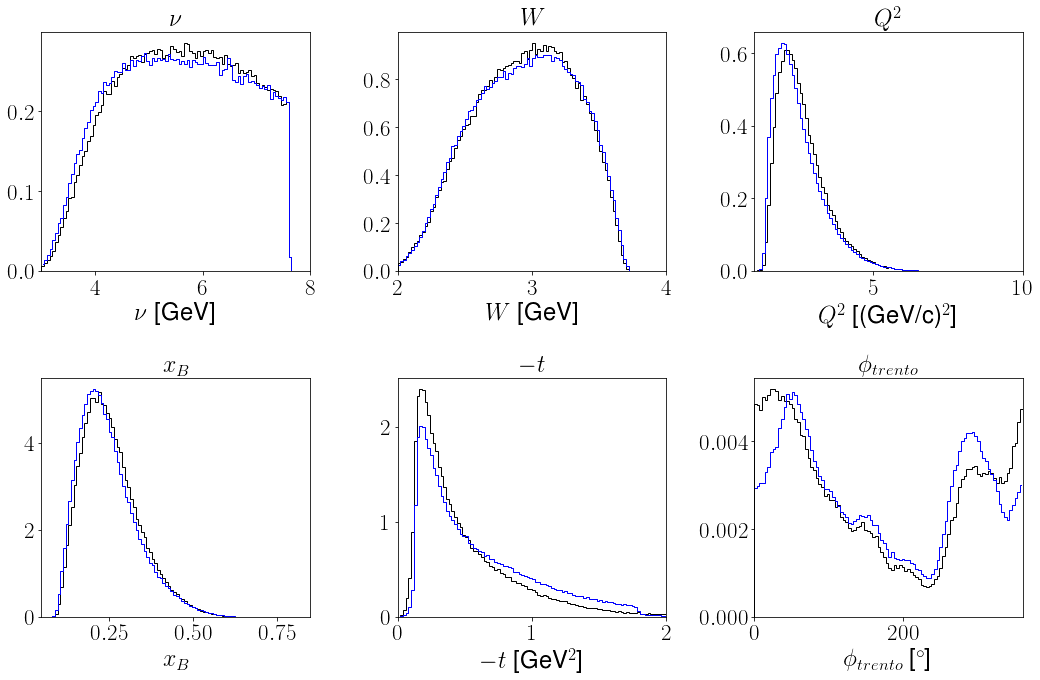

<Figure size 432x288 with 0 Axes>

In [171]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.05, 0, 0]
binends = [8, 4, 10, 0.85, 2, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-c)*simDist_dvcs + c*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 23.83291961541869
reconGam 0.4417447855942893
coplanarity 2.7937712105410832
ME_epg 0.2596993809541924
MM2_epg -0.004954123203962292
MM2_eg 1.0347795636250023
MM2_ep -0.01943151601384498
MPt 0.07777110490345059


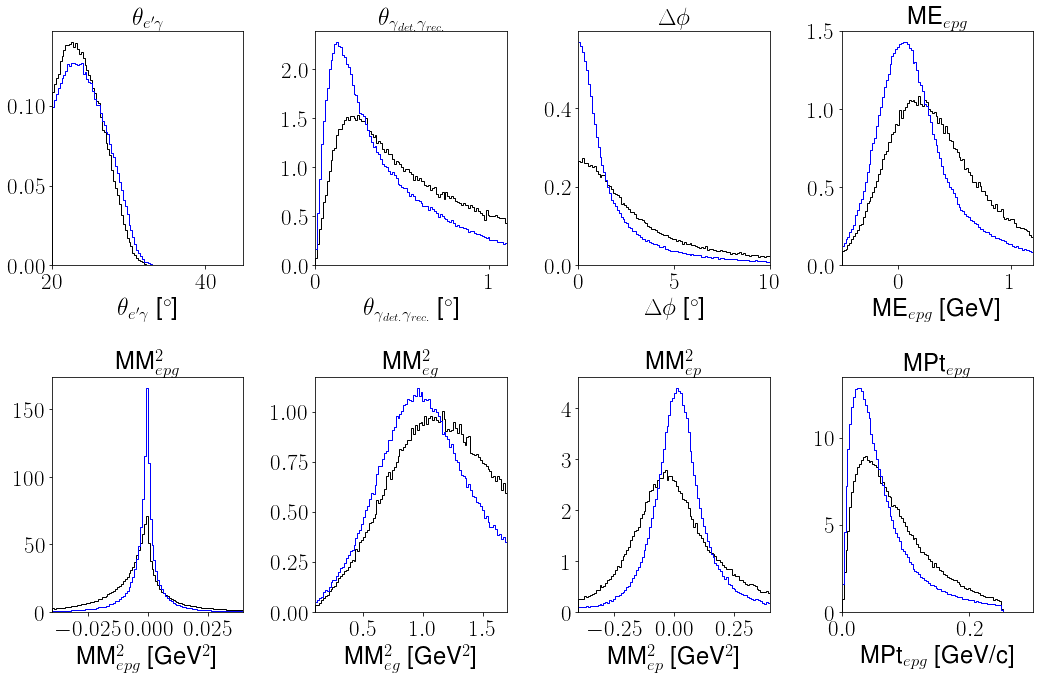

<Figure size 432x288 with 0 Axes>

In [172]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [45, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.3]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-c)*simDist_dvcs + c*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

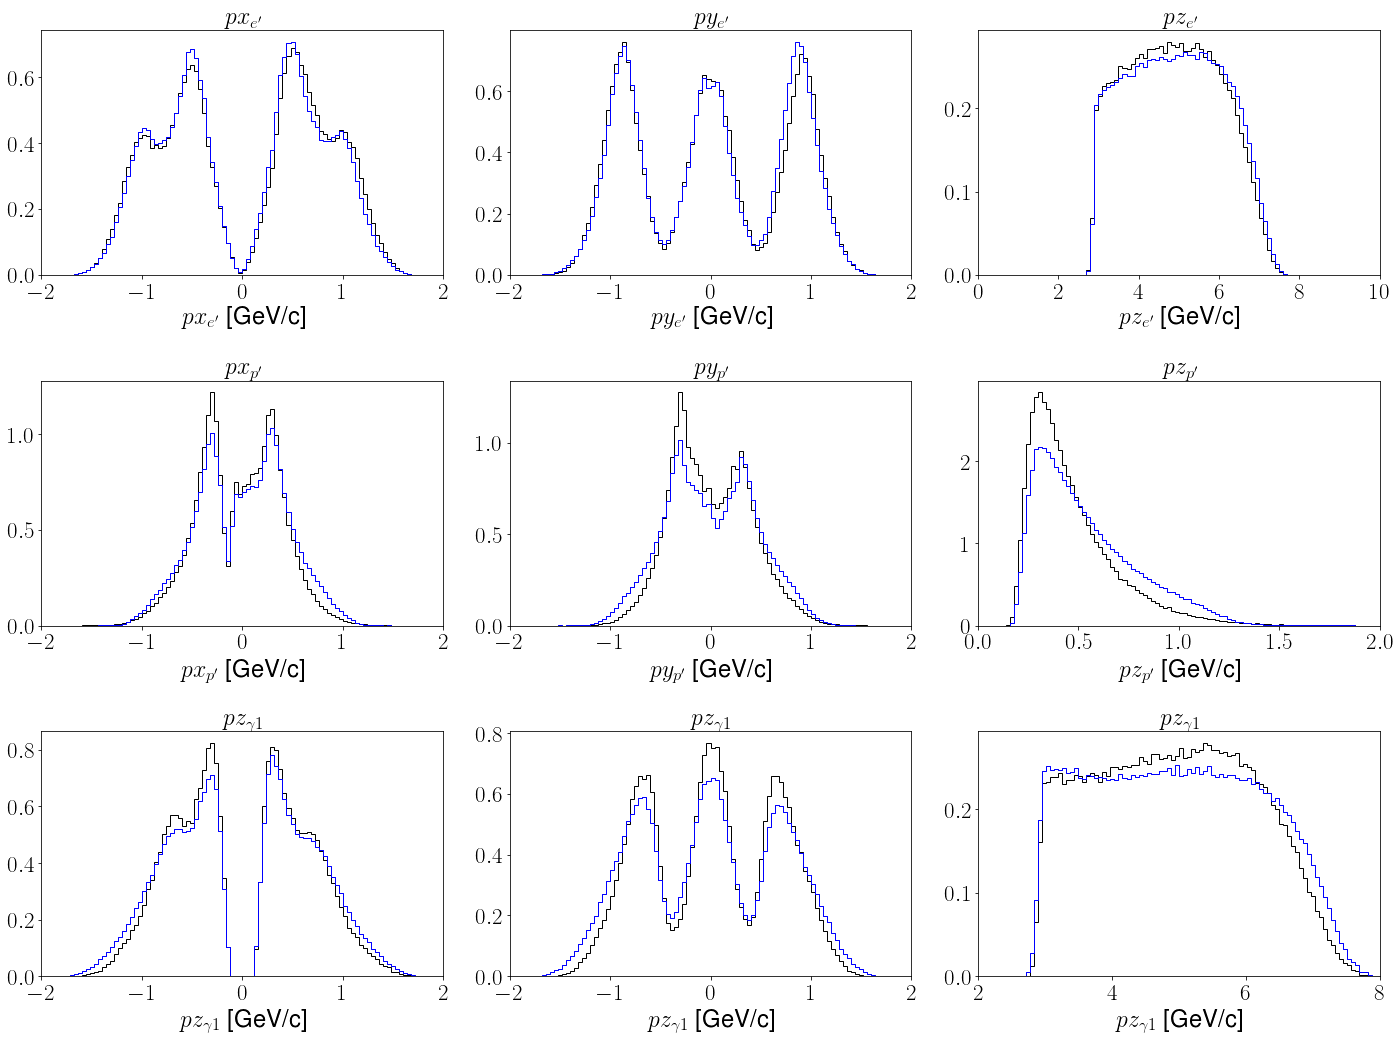

<Figure size 432x288 with 0 Axes>

In [176]:
varstoplot = ["Epx", "Epy", "Epz", "Ppx", "Ppy", "Ppz", "Gpx", "Gpy", "Gpz"]
title = [r"$px_{e'}$", r"$py_{e'}$", r"$pz_{e'}$", r"$px_{p'}$", r"$py_{p'}$", r"$pz_{p'}$", r"$pz_{\gamma1}$", r"$pz_{\gamma1}$", r"$pz_{\gamma1}$", r"$px_{\gamma2}$", r"$py_{\gamma2}$", "$pz_{\gamma2}$"]
unit = [GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
binstarts = [-2, -2, 0, -2, -2, 0, -2, -2, 2, -1, -1, 0]
binends = [2, 2, 10, 2, 2, 2, 2, 2, 8, 1, 1, 5]
fig, axs = plt.subplots(3, 3, figsize = (20,15))
for xind in range(0,3):
    for yind in range(0, 3):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-c)*simDist_dvcs + c*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()


##  Try the new correction

In [504]:
newGpx = exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]])
newGpy = exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]])
newGpz = exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]])
newGp = mag([newGpx, newGpy, newGpz])
newGpx2 = exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpx2"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpx2"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpx2"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpx2"]])
newGpy2 = exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpy2"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpy2"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpy2"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpy2"]])
newGpz2 = exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpz2"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpz2"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpz2"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpz2"]])
newGp2 = mag([newGpx2, newGpy2, newGpz2])

In [505]:
exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"] = newGpx
exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"] = newGpy
exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"] = newGpz
exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"] = newGp

exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpx2"] = newGpx2
exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpy2"] = newGpy2
exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gpz2"] = newGpz2
exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "Gp2"] = newGp2

In [297]:
def saveDVpi0vars(df):
    #set up pi0 variables
    df_epgg = df

    # useful objects
    ele = [df_epgg['Epx'], df_epgg['Epy'], df_epgg['Epz']]
    df_epgg.loc[:, 'Ep'] = mag(ele)
    df_epgg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epgg.loc[:, 'Etheta'] = getTheta(ele)
    df_epgg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epgg['Ppx'], df_epgg['Ppy'], df_epgg['Ppz']]
    df_epgg.loc[:, 'Pp'] = mag(pro)
    df_epgg.loc[:, 'Pe'] = getEnergy(pro, me)
    df_epgg.loc[:, 'Ptheta'] = getTheta(pro)
    df_epgg.loc[:, 'Pphi'] = getPhi(pro)

    gam = [df_epgg['Gpx'], df_epgg['Gpy'], df_epgg['Gpz']]
    df_epgg.loc[:, 'Gp'] = mag(gam)
    df_epgg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epgg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epgg.loc[:, 'Gphi'] = getPhi(gam)

    gam2 = [df_epgg['Gpx2'], df_epgg['Gpy2'], df_epgg['Gpz2']]
    df_epgg.loc[:, 'Gp2'] = mag(gam2)
    df_epgg.loc[:,'Ge2'] = getEnergy(gam2, 0)
    df_epgg.loc[:, 'Gtheta2'] = getTheta(gam2)
    df_epgg.loc[:, 'Gphi2'] = getPhi(gam2)

    pi0 = vecAdd(gam, gam2)
    VGS = [-df_epgg['Epx'], -df_epgg['Epy'], pbeam - df_epgg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissPi0 = [-df_epgg["Epx"] - df_epgg["Ppx"], -df_epgg["Epy"] -
                df_epgg["Ppy"], pbeam - df_epgg["Epz"] - df_epgg["Ppz"]]
    VmissP = [-df_epgg["Epx"] - df_epgg["Gpx"] - df_epgg["Gpx2"], -df_epgg["Epy"] -
                df_epgg["Gpy"] - df_epgg["Gpy2"], pbeam - df_epgg["Epz"] - df_epgg["Gpz"] - df_epgg["Gpz2"]]
    Vmiss = [-df_epgg["Epx"] - df_epgg["Ppx"] - df_epgg["Gpx"] - df_epgg["Gpx2"],
                -df_epgg["Epy"] - df_epgg["Ppy"] - df_epgg["Gpy"] - df_epgg["Gpy2"],
                pbeam - df_epgg["Epz"] - df_epgg["Ppz"] - df_epgg["Gpz"] - df_epgg["Gpz2"]]

    df_epgg.loc[:, 'Mpx'], df_epgg.loc[:, 'Mpy'], df_epgg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epgg.loc[:,'Q2'] = -((ebeam - df_epgg['Ee'])**2 - mag2(VGS))
    df_epgg.loc[:,'nu'] = (ebeam - df_epgg['Ee'])
    df_epgg.loc[:,'xB'] = df_epgg['Q2'] / 2.0 / M / df_epgg['nu']
    df_epgg.loc[:,'t'] = 2 * M * (df_epgg['Pe'] - M)
    df_epgg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epgg['Ee'])**2 - mag2(VGS)))
    df_epgg.loc[:,'MPt'] = np.sqrt((df_epgg["Epx"] + df_epgg["Ppx"] + df_epgg["Gpx"] + df_epgg["Gpx2"])**2 +
                             (df_epgg["Epy"] + df_epgg["Ppy"] + df_epgg["Gpy"] + df_epgg["Gpy2"])**2)
    # trento angles
    df_epgg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epgg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epgg['phi1'], df_epgg['phi1'])

    # exclusivity variables
    df_epgg.loc[:,'MM2_ep'] = (-M - ebeam + df_epgg["Ee"] +
                         df_epgg["Pe"])**2 - mag2(VmissPi0)
    df_epgg.loc[:,'MM2_egg'] = (-M - ebeam + df_epgg["Ee"] +
                         df_epgg["Ge"] + df_epgg["Ge2"])**2 - mag2(VmissP)
    df_epgg.loc[:,'MM2_epgg'] = (-M - ebeam + df_epgg["Ee"] + df_epgg["Pe"] +
                         df_epgg["Ge"] + df_epgg["Ge2"])**2 - mag2(Vmiss)
    df_epgg.loc[:,'ME_epgg'] = (M + ebeam - df_epgg["Ee"] - df_epgg["Pe"] - df_epgg["Ge"] - df_epgg["Ge2"])
    df_epgg.loc[:,'Mpi0'] = pi0InvMass(gam, gam2)
    df_epgg.loc[:,'reconPi'] = angle(VmissPi0, pi0)
    df_epgg.loc[:,"Pie"] = df_epgg['Ge'] + df_epgg['Ge2']
    
    return df_epgg

In [296]:
    def saveDVCSvars(df):
        #set up dvcs variables
        df_epg = df

        ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
        df_epg.loc[:, 'Ep'] = mag(ele)
        df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
        df_epg.loc[:, 'Etheta'] = getTheta(ele)
        df_epg.loc[:, 'Ephi'] = getPhi(ele)

        pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
        df_epg.loc[:, 'Pp'] = mag(pro)
        df_epg.loc[:, 'Pe'] = getEnergy(pro, me)
        df_epg.loc[:, 'Ptheta'] = getTheta(pro)
        df_epg.loc[:, 'Pphi'] = getPhi(pro)

        gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
        df_epg.loc[:, 'Gp'] = mag(gam)
        df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
        df_epg.loc[:, 'Gtheta'] = getTheta(gam)
        df_epg.loc[:, 'Gphi'] = getPhi(gam)

        Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

        VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
                  pbeam - df_epg["Epz"] - df_epg["Ppz"]]
        VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
                  -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
        Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
                 -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
        costheta = cosTheta(VGS, gam)

        df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

        # binning kinematics
        df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
        df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
        df_epg.loc[:,'y'] = df_epg['nu']/ebeam
        df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
        df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
        df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
        / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
        df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

        # trento angles
        df_epg.loc[:,'phi1'] = angle(v3l, v3h)
        df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df_epg['phi1'], df_epg['phi1'])
        df_epg.loc[:,'phi2'] = angle(v3l, v3g)
        df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df_epg['phi2'], df_epg['phi2'])

        # exclusivity variables
        df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                             df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
        df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
        df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
        df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
        df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                                (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
        df_epg.loc[:,'coneAngle'] = angle(ele, gam)
        df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
        df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
        return df_epg

In [506]:
exp_2g_corr = saveDVpi0vars(exp_2g_corr)

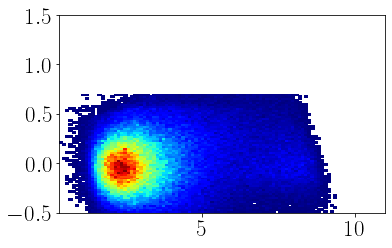

In [471]:
plt.hist2d(exp_2g_corr.Gp, exp_2g_corr.ME_epgg, bins = [101, np.linspace(-0.5, 1.5, 101)], cmap = cmap, cmin =1)
plt.show()

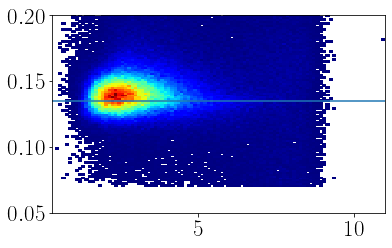

In [507]:
plt.hist2d(exp_2g_corr.Gp, exp_2g_corr.Mpi0, bins = [101, np.linspace(0.05, 0.2, 101)], cmap = cmap, cmin =1)
plt.axhline(0.135)
plt.show()

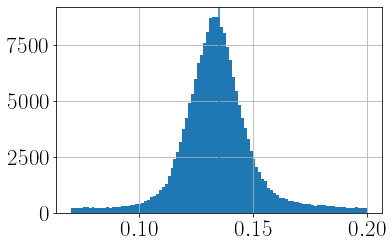

In [494]:
exp_2g_corr.Mpi0.hist(bins = 101)
plt.axvline(0.135)
plt.show()

<AxesSubplot:>

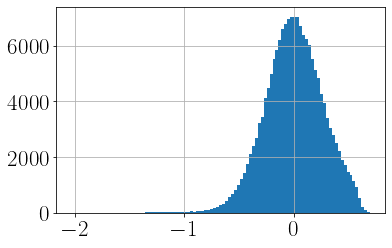

In [491]:
exp_2g_corr.loc[exp_2g_corr.Gsector2<7, "ME_epgg"].hist(bins = 101)

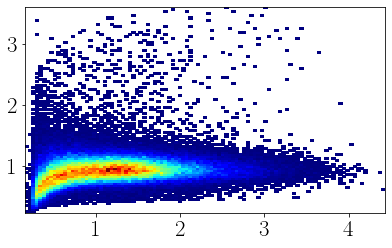

In [508]:
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Psector<7, "Gp2"], (0.135/exp_2g_corr.loc[exp_2g_corr.Psector<7, "Mpi0"])**2, bins = 101, cmin = 1, cmap = cmap)
# plt.plot(np.linspace(0.5, 4, 101), 1+0.13*np.exp(-3*((np.linspace(0.5, 4, 101)-0.5))), color='r')
plt.show()

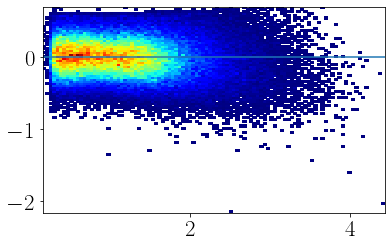

In [500]:
plt.hist2d(exp_2g_corr.loc[exp_2g_corr.Psector<7, "Gp2"], exp_2g_corr.loc[exp_2g_corr.Psector<7, "ME_epgg"], bins = 101, cmin = 1, cmap = cmap)
plt.axhline(0)
plt.show()

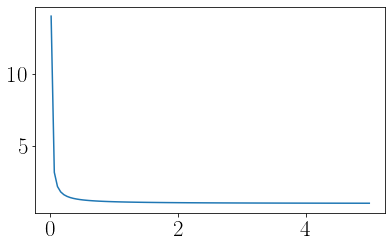

In [509]:
plt.plot(np.linspace(0.01, 5, 101),(np.linspace(0.01, 5, 101)+0.13)/np.linspace(0.01, 5, 101))

In [ ]:
newGpx = exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpx"]])
newGpy = exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpy"]])
newGpz = exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]*0 + np.select([exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<=1, (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]<3) & (exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>1), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]>=3],[exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]*(1+0.1/exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]*0.5*(-exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gp"]+3)), exp_2g_corr.loc[exp_2g_corr.Gsector<7, "Gpz"]])
newGp = mag([newGpx, newGpy, newGpz])

In [547]:
parent_MC = "/Volumes/Extreme SSD/data/MC/convPkl/inbending/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/data/MC/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/data/MC/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/data/exp/convPkl/inb/"

df_2942_corr = pd.read_pickle(parent_MC + "2942.pkl")
df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs_inb_photCorr.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0_inb_photCorr.pkl")

<AxesSubplot:>

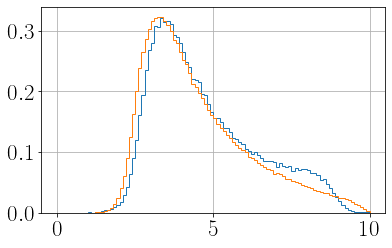

In [548]:
exp_2g_corr.Pie.hist(bins = np.linspace(0, 10, 101), histtype = 'step', density = True)
df_3284_2g_corr.Pie.hist(bins = np.linspace(0, 10, 101), histtype = 'step', density = True)

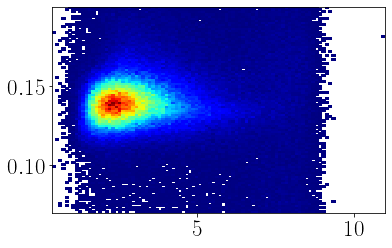

In [521]:
plt.hist2d(exp_2g_corr.Gp, exp_2g_corr.Mpi0, bins = 100, cmap = cmap, cmin = 1)
plt.show()

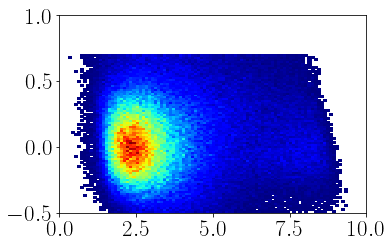

In [523]:
plt.hist2d(exp_2g_corr.Gp, exp_2g_corr.ME_epgg, bins = [np.linspace(0, 10, 101), np.linspace(-0.5, 1, 101)], cmap = cmap, cmin = 1)
plt.show()

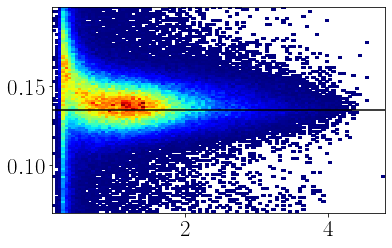

In [525]:
plt.hist2d(exp_2g_corr.Gp2, exp_2g_corr.Mpi0, bins = 100, cmap = cmap, cmin = 1)
plt.axhline(0.135, color = 'k')
plt.show()

<AxesSubplot:>

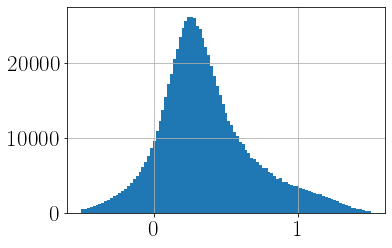

In [542]:
exp_1g_corr.ME_epg.hist(bins = 101)

## Check calibration of experimental data.

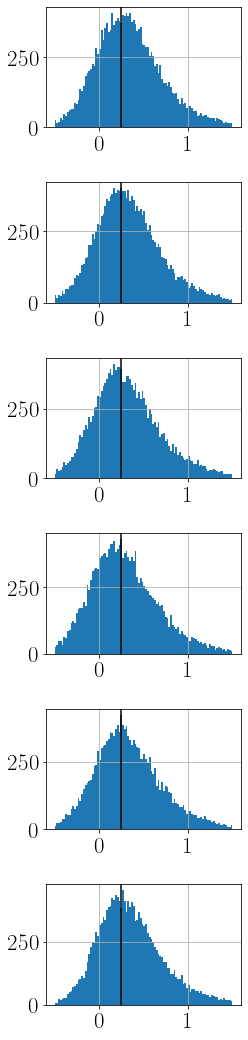

In [21]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 1.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_1g_corr.loc[(exp_1g_corr.Esector==ind+1)& (exp_1g_corr.Psector<7), "ME_epg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.25, color = 'k')

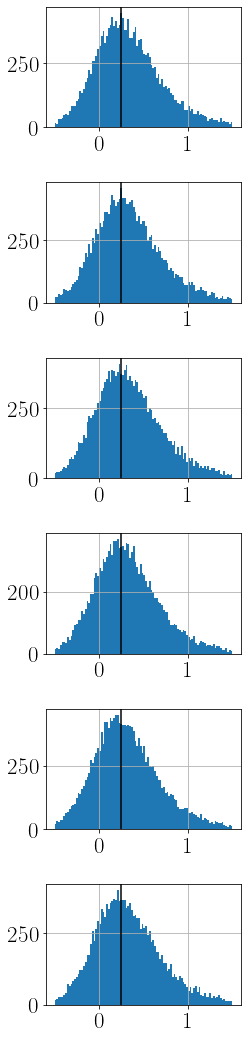

In [22]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 1.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_1g_corr.loc[(exp_1g_corr.Psector==ind+1)& (exp_1g_corr.Psector<7), "ME_epg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.25, color = 'k')

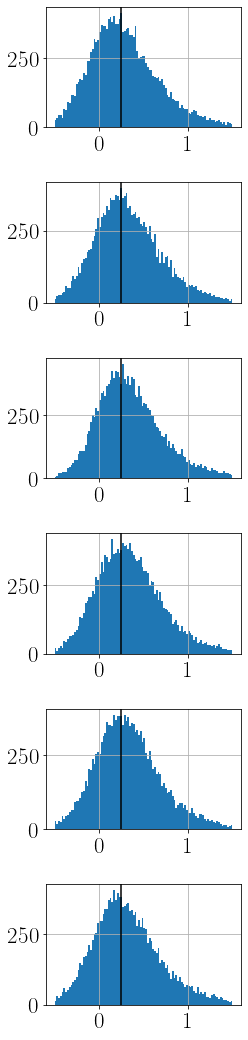

In [20]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 1.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_1g_corr.loc[(exp_1g_corr.Gsector==ind+1)& (exp_1g_corr.Psector<7), "ME_epg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.25, color = 'k')

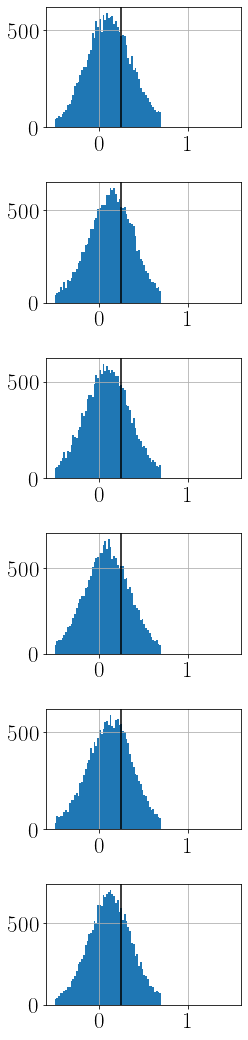

In [19]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 1.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_2g_corr.loc[(exp_2g_corr.Esector==ind+1)& (exp_2g_corr.Psector<7), "ME_epgg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.25, color = 'k')

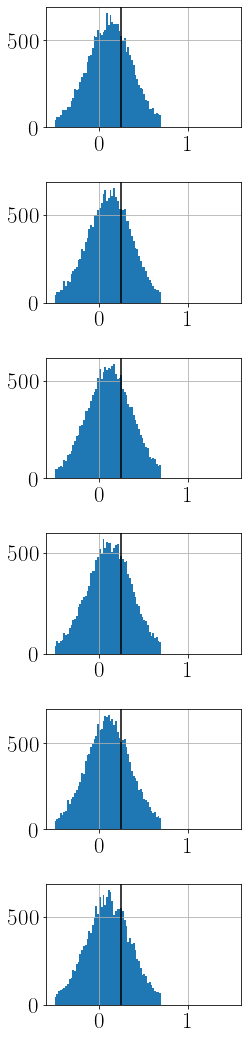

In [23]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 1.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_2g_corr.loc[(exp_2g_corr.Psector==ind+1)& (exp_2g_corr.Psector<7), "ME_epgg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.25, color = 'k')

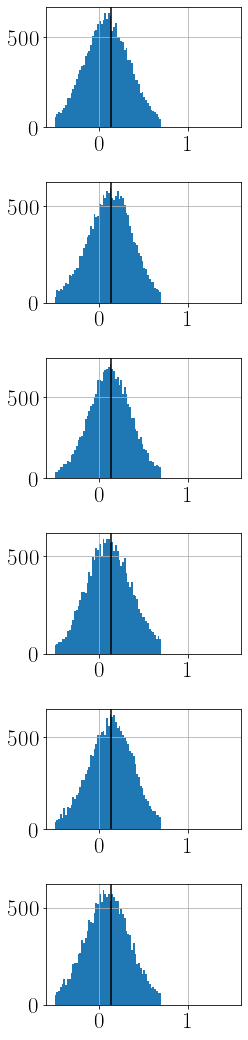

In [34]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 1.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_2g_corr.loc[(exp_2g_corr.Gsector==ind+1)& (exp_2g_corr.Psector<7), "ME_epgg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.13, color = 'k')

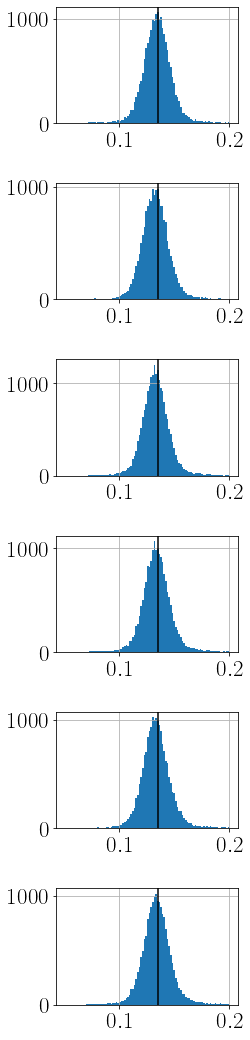

In [26]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = 0.05 # binstarts[ind]
        end = 0.2 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_2g_corr.loc[(exp_2g_corr.Gsector==ind+1)& (exp_2g_corr.Psector<7), "Mpi0"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.135, color = 'k')

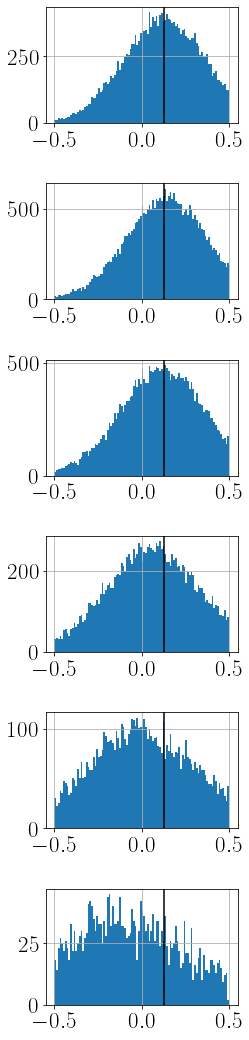

In [56]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 0.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        exp_2g_corr.loc[(exp_2g_corr.Gp2 < ind * 0.5 + 0.5)&(exp_2g_corr.Gp2 > ind * 0.5) &(exp_2g_corr.Psector<7), "ME_epgg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.13, color = 'k')

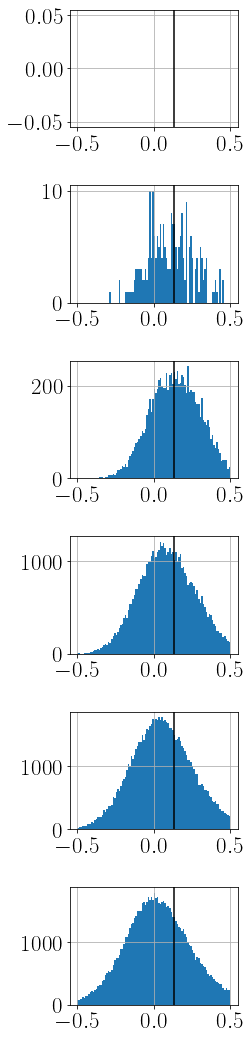

In [135]:
# binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
# binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(6, 1, figsize = (4, 15))
for yind in range(0, 6):
    for xind in range(0, 1):
        ind = yind
        start = -0.5 # binstarts[ind]
        end = 0.5 #binends[ind]
        bins = np.linspace(start, end, 101)
        df_3284_2g_corr.loc[(df_3284_2g_corr.Gp < ind * 0.5+0.5)&(df_3284_2g_corr.Gp > ind * 0.5) &(df_3284_2g_corr.Psector<7), "ME_epgg"].hist(bins = bins, ax = axs[ind])
        axs[ind].axvline(0.13, color = 'k')

<AxesSubplot:>

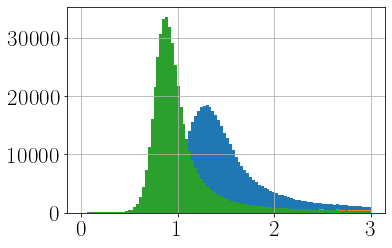

In [165]:
exp_1g_corr.loc[exp_1g_corr.Gsector>7, "MM2_eg"].hist(bins = np.linspace(0,3, 101))
df_3284_1g_corr.loc[df_3284_1g_corr.Gsector>7, "MM2_eg"].hist(bins = np.linspace(0, 3, 101))
df_2942_corr.loc[df_2942_corr.Gsector>7, "MM2_eg"].hist(bins = np.linspace(0, 3, 101))

<AxesSubplot:>

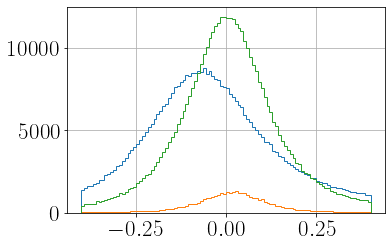

In [170]:
exp_1g_corr.loc[exp_1g_corr.Gsector>7, "MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101), histtype = 'step')
df_3284_1g_corr.loc[df_3284_1g_corr.Gsector>7, "MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101), histtype = 'step')
df_2942_corr.loc[df_2942_corr.Gsector>7, "MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101), histtype = 'step')

In [318]:
def smearing(df, sigma = [0.01, 0.01, 0.01], mode = 'dvcs'):
    df_copy = copy(df)
    df_copy.loc[:, "Ep"] = np.random.normal(0, sigma[0], len(df)) + df_copy.Ep
    df_copy.loc[:, "Etheta"] = np.random.normal(0, sigma[1], len(df)) + df.Etheta
    df_copy.loc[:, "Ephi"] = np.random.normal(0, sigma[2], len(df)) + df.Ephi
    df_copy.loc[:, "Epx"] = df_copy.Ep * np.sin(np.radians(df_copy.Etheta)) * np.cos(np.radians(df_copy.Ephi))
    df_copy.loc[:, "Epy"] = df_copy.Ep * np.sin(np.radians(df_copy.Etheta)) * np.sin(np.radians(df_copy.Ephi))
    df_copy.loc[:, "Epz"] = df_copy.Ep * np.cos(np.radians(df_copy.Etheta))

    df_copy.loc[:, "Pp"] = np.random.normal(0, sigma[0], len(df)) + df_copy.Pp
    df_copy.loc[:, "Ptheta"] = np.random.normal(0, sigma[1], len(df)) + df_copy.Ptheta
    df_copy.loc[:, "Pphi"] = np.random.normal(0, sigma[2], len(df)) + df_copy.Pphi
    df_copy.loc[:, "Ppx"] = df_copy.Pp * np.sin(np.radians(df_copy.Ptheta)) * np.cos(np.radians(df_copy.Pphi))
    df_copy.loc[:, "Ppy"] = df_copy.Pp * np.sin(np.radians(df_copy.Ptheta)) * np.sin(np.radians(df_copy.Pphi))
    df_copy.loc[:, "Ppz"] = df_copy.Pp * np.cos(np.radians(df_copy.Ptheta))

    df_copy.loc[:, "Gp"] = np.random.normal(0, sigma[0], len(df)) + df_copy.Gp
    df_copy.loc[:, "Gtheta"] = np.random.normal(0, sigma[1], len(df)) + df_copy.Gtheta
    df_copy.loc[:, "Gphi"] = np.random.normal(0, sigma[2], len(df)) + df_copy.Gphi
    df_copy.loc[:, "Gpx"] = df_copy.Gp * np.sin(np.radians(df_copy.Gtheta)) * np.cos(np.radians(df_copy.Gphi))
    df_copy.loc[:, "Gpy"] = df_copy.Gp * np.sin(np.radians(df_copy.Gtheta)) * np.sin(np.radians(df_copy.Gphi))
    df_copy.loc[:, "Gpz"] = df_copy.Gp * np.cos(np.radians(df_copy.Gtheta))

    if mode == "dvcs":
        df_copy = saveDVCSvars(df_copy)
    elif mode == "pi0":
        df_copy.loc[:, "Gp2"] = np.random.normal(0, sigma[0], len(df)) + df.Gp2
        df_copy.loc[:, "Gtheta2"] = np.random.normal(0, sigma[1], len(df)) + df.Gtheta2
        df_copy.loc[:, "Gphi2"] = np.random.normal(0, sigma[2], len(df)) + df.Gphi2
        df_copy.loc[:, "Gpx2"] = df_copy.Gp2 * np.sin(np.radians(df_copy.Gtheta2)) * np.cos(np.radians(df_copy.Gphi2))
        df_copy.loc[:, "Gpy2"] = df_copy.Gp2 * np.sin(np.radians(df_copy.Gtheta2)) * np.sin(np.radians(df_copy.Gphi2))
        df_copy.loc[:, "Gpz2"] = df_copy.Gp2 * np.cos(np.radians(df_copy.Gtheta2))
        
        df_copy = saveDVpi0vars(df_copy)
    return df_copy

In [319]:
smearing(df_3284_2g_corr, mode ='pi0', sigma = [0, 40, 0]).Ptheta - df_3284_2g_corr.Ptheta

0         -7.845949
1          2.122139
2         67.248844
3        -34.334288
4        -21.210940
            ...    
747799     0.254417
747800    11.265991
747801    -4.535039
747802    -3.691522
747803   -32.111700
Name: Ptheta, Length: 747804, dtype: float64

<AxesSubplot:>

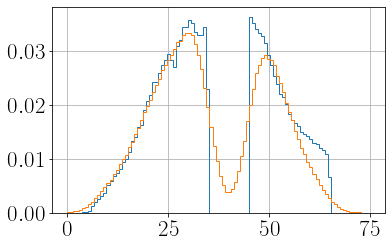

In [324]:
exp_2g_corr.Ptheta.hist(bins = np.linspace(0, 75, 101), histtype = 'step', density= True)
smearing(df_3284_2g_corr, mode ='pi0', sigma = [0, 3, 0]).Ptheta.hist(bins = np.linspace(0, 75, 101), histtype = 'step', density = True)

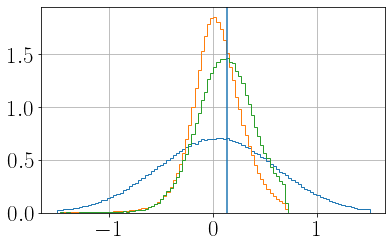

In [283]:
# smearing(df_3284_1g_corr, sigma = 0).ME_epg.hist(bins= np.linspace(0, 1.5))
# smearing(df_3284_1g_corr, sigma = 0.5).ME_epg.hist(bins= np.linspace(0, 1.5))
# smearing(df_3284_1g_corr, sigma = 0.5).xB.hist(bins= np.linspace(0, 1.5))
# smearing(df_3284_1g_corr, sigma = 0).xB.hist(bins= np.linspace(0, 1.5))
smearing(smearing(df_3284_2g_corr, part='elec', mode = 'pi0', sigma = 0.5), mode = 'pi0', part='phot', sigma = 0.1).ME_epgg.hist(bins= np.linspace(-1.5, 1.5, 101), histtype = 'step', density = True)
smearing(df_3284_2g_corr, mode = 'pi0', sigma = 0).ME_epgg.hist(bins= np.linspace(-1.5, 1.5, 101), histtype = 'step', density = True)
smearing(exp_2g_corr, mode = 'pi0', sigma = 0).ME_epgg.hist(bins= np.linspace(-1.5, 1.5, 101), histtype = 'step', density = True)
plt.axvline(0.13)

In [184]:
df_2942_corr.Ep*np.random.normal(0, 0.01, len(df_2942_corr.Ep))/df_2942_corr.Ep

0         0.001506
1        -0.003449
2         0.007536
3         0.004808
4         0.004465
            ...   
794245    0.010412
794246   -0.005817
794247    0.006342
794248    0.006411
794249    0.000392
Name: Ep, Length: 794250, dtype: float64

<AxesSubplot:>

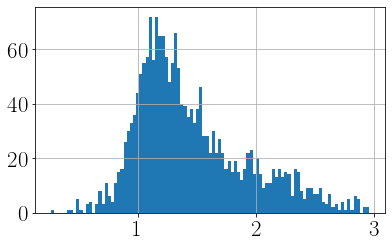

In [176]:
exp_1g_corr.loc[(exp_1g_corr.Gsector>7)&(exp_1g_corr.Psector<7), "MM2_eg"].hist(bins = 101)

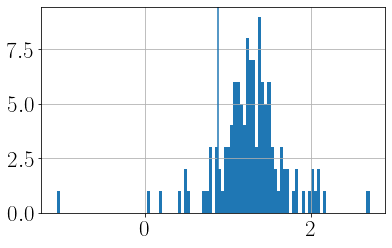

In [178]:
exp_2g_corr.loc[(exp_2g_corr.Gsector>7)&(exp_2g_corr.Psector<7), "MM2_egg"].hist(bins = 101)
plt.axvline(0.938**2)